<a href="https://colab.research.google.com/github/RSDUNN0809/hr_analytics_case_study/blob/main/working_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Identification of Employee Turnover Risk using Machine Learning: A Path to Enhanced Organizational Insights for Retention Strategies

Technical Notebook

In [1]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#turn off warnings for ease of viewing
import warnings
warnings.filterwarnings("ignore")

#set option to see all columns in output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

## Create the SQLITE3 Database, Tables and INSERT records from HR Case Study .csv files

##### *** Once this step has been completed, this code does not need to be ran again - it will also return an error message as the tables and data have already been loaded *** 

In [ ]:
# Connect to a sqlite3 database, or create one if it does not exist
conn = sqlite3.connect('/content/drive/My Drive/MS-ADS Capstone Project/data/hr_case_study.db')

# Create the cursor object
cursor = conn.cursor()

# Execute CREATE TABLE commands to create the required tables in the hr_case_study.db

# Create employee_survey_data table
cursor.execute('''CREATE TABLE IF NOT EXISTS employee_survey_data
                (EmployeeID TEXT PRIMARY KEY, EnvironmentSatisfaction TEXT, JobSatisfaction TEXT, WorkLifeBalance TEXT)''')

# Create manager_survey_data table
cursor.execute('''CREATE TABLE IF NOT EXISTS manager_survey_data
                (EmployeeID TEXT PRIMARY KEY, JobInvolvement TEXT, PerformanceRating TEXT)''')

# Create general_data table
cursor.execute('''CREATE TABLE IF NOT EXISTS general_data
                (Age INT, Attrition TEXT, BusinessTravel TEXT, Department TEXT, DistanceFromHome INT, Education INT, EducationField TEXT, EmployeeCount INT, EmployeeID TEXT,
                Gender TEXT, JobLevel INT, JobRole TEXT, MaritalStatus TEXT, MonthlyIncome INT, NumCompaniesWorked TEXT, Over18 TEXT, PercentSalaryHike INT, 
                StandardHours INT, StockOptionLevel INT, TotalWorkingYears TEXT, TrainingTimesLastYear TEXT, YearsAtCompany TEXT, YearsSinceLastPromotion TEXT, YearsWithCurrentManager TEXT)''')

# save the changes to the database
conn.commit()

##### Write the data from .csv files to each table ##### 

with open('/content/drive/My Drive/MS-ADS Capstone Project/data/employee_survey_data.csv', 'r') as csvfile:
    # read contents of .csv file and insert data into SQLite database
    csvreader = csv.reader(csvfile)
    # skip the first row of data
    next(csvreader)
    for row in csvreader:
        cursor.execute("INSERT or REPLACE INTO employee_survey_data (EmployeeID, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance) VALUES (?, ?, ?, ?)", (row[0], row[1], row[2], row[3]))
# save changes and commit to database
conn.commit()

with open('/content/drive/My Drive/MS-ADS Capstone Project/data/manager_survey_data.csv', 'r') as csvfile:
    # read contents of .csv file and insert data into SQLite database
    csvreader = csv.reader(csvfile)
    # skip the first row of data
    next(csvreader)
    for row in csvreader:
        cursor.execute("INSERT or REPLACE INTO manager_survey_data (EmployeeID, JobInvolvement, PerformanceRating) VALUES (?, ?, ?)", (row[0], row[1], row[2]))
# save changes and commit to database
conn.commit()

with open('/content/drive/My Drive/MS-ADS Capstone Project/data/general_data.csv', 'r') as csvfile:
    # read contents of .csv file and insert data into SQLite database
    csvreader = csv.reader(csvfile)
    # skip the first row of data
    next(csvreader)
    for row in csvreader:
        cursor.execute("""INSERT INTO general_data (Age, Attrition, BusinessTravel, Department, DistanceFromHome, Education, EducationField, EmployeeCount, 
        EmployeeID, Gender, JobLevel, JobRole, MaritalStatus, MonthlyIncome, NumCompaniesWorked, Over18, PercentSalaryHike, StandardHours, StockOptionLevel, 
        TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrentManager) 
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""",
                       (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9], row[10], row[11], row[12], row[13], row[14], row[15], 
                        row[16], row[17], row[18],row[19], row[20], row[21], row[22], row[23]))
# save changes and commit to database
conn.commit()

# close the cursor and connection objects
cursor.close()
conn.close()

## Query the Database

#### SELECT all records from general_data TABLE

In [ ]:
# connect to the database
conn = sqlite3.connect('/content/drive/My Drive/MS-ADS Capstone Project/data/hr_case_study.db')

##### Query general_data table ##### 
# create cursor object and query table
cursor = conn.cursor()
cursor.execute('SELECT * FROM general_data')

# identify the column names for dataframe
col_names = [desc[0] for desc in cursor.description]

# fetch all rows from the query and store in dataframe
rows = cursor.fetchall()
general_df = pd.DataFrame(rows, columns = col_names)

# close the cursor and connection objects
cursor.close()
conn.close()

In [ ]:
print(general_df.shape)

(4410, 24)


#### SELECT all records from employee_survey_data TABLE

In [ ]:
# connect to the database
conn = sqlite3.connect('/content/drive/My Drive/MS-ADS Capstone Project/data/hr_case_study.db')

##### Query general_data table ##### 
# create cursor object and query table
cursor = conn.cursor()
cursor.execute('SELECT * FROM employee_survey_data')

# identify the column names for dataframe
col_names = [desc[0] for desc in cursor.description]

# fetch all rows from the query and store in dataframe
rows = cursor.fetchall()
employee_survey_df = pd.DataFrame(rows, columns = col_names)

# close the cursor and connection objects
cursor.close()
conn.close()

In [ ]:
print(employee_survey_df.shape)

(4410, 4)


#### SELECT all records from the manger_survey_data TABLE

In [ ]:
# connect to the database
conn = sqlite3.connect('/content/drive/My Drive/MS-ADS Capstone Project/data/hr_case_study.db')

##### Query general_data table ##### 
# create cursor object and query table
cursor = conn.cursor()
cursor.execute('SELECT * FROM manager_survey_data')

# identify the column names for dataframe
col_names = [desc[0] for desc in cursor.description]

# fetch all rows from the query and store in dataframe
rows = cursor.fetchall()
manager_survey_df = pd.DataFrame(rows, columns = col_names)

# close the cursor and connection objects
cursor.close()
conn.close()

In [ ]:
print(manager_survey_df.shape)

(4410, 3)


#### Master Query to get all data needed from database

In [ ]:
# connect to the database
conn = sqlite3.connect('/content/drive/My Drive/MS-ADS Capstone Project/data/hr_case_study.db')

##### Query general_data table ##### 
# create cursor object and query table
cursor = conn.cursor()
cursor.execute("""SELECT * FROM general_data as g

                  LEFT JOIN manager_survey_data m
                    ON m.EmployeeID = g.EmployeeID

                  LEFT JOIN employee_survey_data as e
                    ON e.EmployeeID = g.EmployeeID 
                  
                --  WHERE m.EmployeeID = e.EmployeeID
                 --   AND e.EmployeeID = m.EmployeeID
                    """)

# identify the column names for dataframe
col_names = [desc[0] for desc in cursor.description]

# fetch all rows from the query and store in dataframe
rows = cursor.fetchall()
total_df = pd.DataFrame(rows, columns = col_names)

# close the cursor and connection objects
cursor.close()
conn.close()

In [ ]:
# create a new dataframe names dups that is a boolean array that indicates whether each row is a duplicate
dups = total_df.duplicated()

# view the duplicated rows for validation
print('Number of duplicate rows = %d' % (dups.sum()))

#drop the duplicate EmployeeID's
total_df = total_df.T.drop_duplicates().T


Number of duplicate rows = 0


In [ ]:
print(total_df.shape)
total_df.head()

(4410, 29)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0,3,3,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4,2,4,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3,3,3,2,2,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3,Y,11,8,3,13,5,8,7,5,2,3,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4,Y,12,8,2,9,2,6,0,4,3,3,4,1,3


In [ ]:
total_df.dtypes

Age                        object
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome           object
Education                  object
EducationField             object
EmployeeCount              object
EmployeeID                 object
Gender                     object
JobLevel                   object
JobRole                    object
MaritalStatus              object
MonthlyIncome              object
NumCompaniesWorked         object
Over18                     object
PercentSalaryHike          object
StandardHours              object
StockOptionLevel           object
TotalWorkingYears          object
TrainingTimesLastYear      object
YearsAtCompany             object
YearsSinceLastPromotion    object
YearsWithCurrentManager    object
JobInvolvement             object
PerformanceRating          object
EnvironmentSatisfaction    object
JobSatisfaction            object
WorkLifeBalance            object
dtype: object

#### Bring in the Time-in and Time-out .csv files

In [ ]:
# Import the in_time.csv
in_df = pd.read_csv('/content/drive/My Drive/MS-ADS Capstone Project/data/in_time.csv')
print(in_df.shape)
in_df.head()

(4410, 262)


,EmployeeID,1/1/15,1/2/15,1/5/15,1/6/15,1/7/15,1/8/15,1/9/15,1/12/15,1/13/15,1/14/15,1/15/15,1/16/15,1/19/15,1/20/15,1/21/15,1/22/15,1/23/15,1/26/15,1/27/15,1/28/15,1/29/15,1/30/15,2/2/15,2/3/15,2/4/15,2/5/15,2/6/15,2/9/15,2/10/15,2/11/15,2/12/15,2/13/15,2/16/15,2/17/15,2/18/15,2/19/15,2/20/15,2/23/15,2/24/15,2/25/15,2/26/15,2/27/15,3/2/15,3/3/15,3/4/15,3/5/15,3/6/15,3/9/15,3/10/15,3/11/15,3/12/15,3/13/15,3/16/15,3/17/15,3/18/15,3/19/15,3/20/15,3/23/15,3/24/15,3/25/15,3/26/15,3/27/15,3/30/15,3/31/15,4/1/15,4/2/15,4/3/15,4/6/15,4/7/15,4/8/15,4/9/15,4/10/15,4/13/15,4/14/15,4/15/15,4/16/15,4/17/15,4/20/15,4/21/15,4/22/15,4/23/15,4/24/15,4/27/15,4/28/15,4/29/15,4/30/15,5/1/15,5/4/15,5/5/15,5/6/15,5/7/15,5/8/15,5/11/15,5/12/15,5/13/15,5/14/15,5/15/15,5/18/15,5/19/15,5/20/15,5/21/15,5/22/15,5/25/15,5/26/15,5/27/15,5/28/15,5/29/15,6/1/15,6/2/15,6/3/15,6/4/15,6/5/15,6/8/15,6/9/15,6/10/15,6/11/15,6/12/15,6/15/15,6/16/15,6/17/15,6/18/15,6/19/15,6/22/15,6/23/15,6/24/15,6/25/15,6/26/15,6/29/15,6/30/15,7/1/15,7/2/15,7/3/15,7/6/15,7/7/15,7/8/15,7/9/15,7/10/15,7/13/15,7/14/15,7/15/15,7/16/15,7/17/15,7/20/15,7/21/15,7/22/15,7/23/15,7/24/15,7/27/15,7/28/15,7/29/15,7/30/15,7/31/15,8/3/15,8/4/15,8/5/15,8/6/15,8/7/15,8/10/15,8/11/15,8/12/15,8/13/15,8/14/15,8/17/15,8/18/15,8/19/15,8/20/15,8/21/15,8/24/15,8/25/15,8/26/15,8/27/15,8/28/15,8/31/15,9/1/15,9/2/15,9/3/15,9/4/15,9/7/15,9/8/15,9/9/15,9/10/15,9/11/15,9/14/15,9/15/15,9/16/15,9/17/15,9/18/15,9/21/15,9/22/15,9/23/15,9/24/15,9/25/15,9/28/15,9/29/15,9/30/15,10/1/15,10/2/15,10/5/15,10/6/15,10/7/15,10/8/15,10/9/15,10/12/15,10/13/15,10/14/15,10/15/15,10/16/15,10/19/15,10/20/15,10/21/15,10/22/15,10/23/15,10/26/15,10/27/15,10/28/15,10/29/15,10/30/15,11/2/15,11/3/15,11/4/15,11/5/15,11/6/15,11/9/15,11/10/15,11/11/15,11/12/15,11/13/15,11/16/15,11/17/15,11/18/15,11/19/15,11/20/15,11/23/15,11/24/15,11/25/15,11/26/15,11/27/15,11/30/15,12/1/15,12/2/15,12/3/15,12/4/15,12/7/15,12/8/15,12/9/15,12/10/15,12/11/15,12/14/15,12/15/15,12/16/15,12/17/15,12/18/15,12/21/15,12/22/15,12/23/15,12/24/15,12/25/15,12/28/15,12/29/15,12/30/15,12/31/15
0,1,NaN,1/2/15 9:43,1/5/15 10:08,1/6/15 9:54,1/7/15 9:34,1/8/15 9:51,1/9/15 10:09,1/12/15 9:42,1/13/15 10:13,NaN,1/15/15 10:01,1/16/15 10:19,NaN,1/20/15 9:50,1/21/15 9:49,1/22/15 9:47,1/23/15 9:23,NaN,1/27/15 9:50,1/28/15 9:56,1/29/15 9:53,1/30/15 10:09,2/2/15 9:38,2/3/15 10:23,2/4/15 9:48,2/5/15 9:52,2/6/15 9:53,2/9/15 10:01,2/10/15 10:14,2/11/15 10:18,2/12/15 10:10,2/13/15 9:13,2/16/15 10:14,2/17/15 10:03,2/18/15 10:23,NaN,2/20/15 9:54,2/23/15 9:46,2/24/15 10:11,2/25/15 9:52,2/26/15 9:56,2/27/15 9:58,3/2/15 10:19,3/3/15 10:08,3/4/15 10:05,NaN,3/6/15 9:55,3/9/15 10:28,3/10/15 9:47,3/11/15 9:48,3/12/15 10:10,3/13/15 10:07,NaN,3/17/15 10:05,3/18/15 10:28,3/19/15 10:01,3/20/15 10:37,3/23/15 10:11,3/24/15 10:33,3/25/15 9:41,NaN,3/27/15 9:47,3/30/15 10:11,3/31/15 10:08,4/1/15 10:12,4/2/15 9:45,4/3/15 10:00,4/6/15 9:40,4/7/15 10:16,4/8/15 10:04,4/9/15 9:21,4/10/15 9:46,4/13/15 9:39,4/14/15 9:58,4/15/15 9:55,4/16/15 9:46,4/17/15 9:54,4/20/15 10:03,4/21/15 9:50,4/22/15 9:56,4/23/15 10:12,4/24/15 10:05,4/27/15 10:12,4/28/15 9:57,4/29/15 9:46,4/30/15 9:48,NaN,5/4/15 9:40,5/5/15 9:54,5/6/15 9:49,5/7/15 10:06,5/8/15 9:55,NaN,5/12/15 9:50,5/13/15 10:24,5/14/15 9:50,5/15/15 9:55,NaN,5/19/15 9:49,5/20/15 10:00,5/21/15 9:53,5/22/15 10:19,5/25/15 10:15,5/26/15 10:17,5/27/15 9:41,5/28/15 9:57,NaN,NaN,6/2/15 10:20,6/3/15 9:47,6/4/15 10:23,NaN,6/8/15 10:17,NaN,6/10/15 9:54,6/11/15 9:47,6/12/15 10:13,6/15/15 9:50,6/16/15 9:59,6/17/15 9:46,6/18/15 10:03,6/19/15 10:06,6/22/15 9:48,6/23/15 9:56,6/24/15 9:59,6/25/15 9:52,6/26/15 10:07,6/29/15 10:01,6/30/15 10:27,7/1/15 9:39,7/2/15 10:07,7/3/15 9:59,7/6/15 9:37,7/7/15 10:08,7/8/15 9:56,7/9/15 9:21,7/10/15 9:43,7/13/15 10:07,7/14/15 10:06,7/15/15 9:54,7/16/15 10:22,NaN,7/20/15 10:25,7/21/15 9:48,7/22/15 9:52,7/23/15 10:04,7/24/15 9:34,7/27/15 9:56,7/28/15 10:19,7/29/15 9:48,7/30/15 9:52,7/31/15 10:11,8/3/15 10:03,8/4/15 9:59,8/5/15 9:50,8/6/15 9:56,8/7/15

In [ ]:
# Import the out_time.csv
out_df = pd.read_csv('/content/drive/My Drive/MS-ADS Capstone Project/data/out_time.csv')
print(out_df.shape)
out_df.head()

(4410, 262)


,EmployeeID,1/1/15,1/2/15,1/5/15,1/6/15,1/7/15,1/8/15,1/9/15,1/12/15,1/13/15,1/14/15,1/15/15,1/16/15,1/19/15,1/20/15,1/21/15,1/22/15,1/23/15,1/26/15,1/27/15,1/28/15,1/29/15,1/30/15,2/2/15,2/3/15,2/4/15,2/5/15,2/6/15,2/9/15,2/10/15,2/11/15,2/12/15,2/13/15,2/16/15,2/17/15,2/18/15,2/19/15,2/20/15,2/23/15,2/24/15,2/25/15,2/26/15,2/27/15,3/2/15,3/3/15,3/4/15,3/5/15,3/6/15,3/9/15,3/10/15,3/11/15,3/12/15,3/13/15,3/16/15,3/17/15,3/18/15,3/19/15,3/20/15,3/23/15,3/24/15,3/25/15,3/26/15,3/27/15,3/30/15,3/31/15,4/1/15,4/2/15,4/3/15,4/6/15,4/7/15,4/8/15,4/9/15,4/10/15,4/13/15,4/14/15,4/15/15,4/16/15,4/17/15,4/20/15,4/21/15,4/22/15,4/23/15,4/24/15,4/27/15,4/28/15,4/29/15,4/30/15,5/1/15,5/4/15,5/5/15,5/6/15,5/7/15,5/8/15,5/11/15,5/12/15,5/13/15,5/14/15,5/15/15,5/18/15,5/19/15,5/20/15,5/21/15,5/22/15,5/25/15,5/26/15,5/27/15,5/28/15,5/29/15,6/1/15,6/2/15,6/3/15,6/4/15,6/5/15,6/8/15,6/9/15,6/10/15,6/11/15,6/12/15,6/15/15,6/16/15,6/17/15,6/18/15,6/19/15,6/22/15,6/23/15,6/24/15,6/25/15,6/26/15,6/29/15,6/30/15,7/1/15,7/2/15,7/3/15,7/6/15,7/7/15,7/8/15,7/9/15,7/10/15,7/13/15,7/14/15,7/15/15,7/16/15,7/17/15,7/20/15,7/21/15,7/22/15,7/23/15,7/24/15,7/27/15,7/28/15,7/29/15,7/30/15,7/31/15,8/3/15,8/4/15,8/5/15,8/6/15,8/7/15,8/10/15,8/11/15,8/12/15,8/13/15,8/14/15,8/17/15,8/18/15,8/19/15,8/20/15,8/21/15,8/24/15,8/25/15,8/26/15,8/27/15,8/28/15,8/31/15,9/1/15,9/2/15,9/3/15,9/4/15,9/7/15,9/8/15,9/9/15,9/10/15,9/11/15,9/14/15,9/15/15,9/16/15,9/17/15,9/18/15,9/21/15,9/22/15,9/23/15,9/24/15,9/25/15,9/28/15,9/29/15,9/30/15,10/1/15,10/2/15,10/5/15,10/6/15,10/7/15,10/8/15,10/9/15,10/12/15,10/13/15,10/14/15,10/15/15,10/16/15,10/19/15,10/20/15,10/21/15,10/22/15,10/23/15,10/26/15,10/27/15,10/28/15,10/29/15,10/30/15,11/2/15,11/3/15,11/4/15,11/5/15,11/6/15,11/9/15,11/10/15,11/11/15,11/12/15,11/13/15,11/16/15,11/17/15,11/18/15,11/19/15,11/20/15,11/23/15,11/24/15,11/25/15,11/26/15,11/27/15,11/30/15,12/1/15,12/2/15,12/3/15,12/4/15,12/7/15,12/8/15,12/9/15,12/10/15,12/11/15,12/14/15,12/15/15,12/16/15,12/17/15,12/18/15,12/21/15,12/22/15,12/23/15,12/24/15,12/25/15,12/28/15,12/29/15,12/30/15,12/31/15
0,1,NaN,1/2/15 16:56,1/5/15 17:20,1/6/15 17:19,1/7/15 16:34,1/8/15 17:08,1/9/15 17:38,1/12/15 16:58,1/13/15 18:02,NaN,1/15/15 17:22,1/16/15 17:35,NaN,1/20/15 16:37,1/21/15 16:55,1/22/15 16:50,1/23/15 17:00,NaN,1/27/15 17:28,1/28/15 17:03,1/29/15 17:18,1/30/15 17:00,2/2/15 16:32,2/3/15 17:35,2/4/15 17:24,2/5/15 17:26,2/6/15 17:21,2/9/15 17:37,2/10/15 17:30,2/11/15 17:30,2/12/15 17:36,2/13/15 16:25,2/16/15 17:50,2/17/15 17:28,2/18/15 18:13,NaN,2/20/15 17:44,2/23/15 17:13,2/24/15 17:24,2/25/15 17:27,2/26/15 17:08,2/27/15 17:21,3/2/15 17:29,3/3/15 16:54,3/4/15 17:50,NaN,3/6/15 17:44,3/9/15 17:53,3/10/15 16:42,3/11/15 16:58,3/12/15 17:15,3/13/15 17:25,NaN,3/17/15 17:00,3/18/15 17:40,3/19/15 17:52,3/20/15 17:47,3/23/15 17:48,3/24/15 17:48,3/25/15 17:08,NaN,3/27/15 17:20,3/30/15 17:33,3/31/15 18:00,4/1/15 17:32,4/2/15 17:24,4/3/15 17:11,4/6/15 16:42,4/7/15 17:55,4/8/15 17:30,4/9/15 17:09,4/10/15 16:53,4/13/15 17:00,4/14/15 17:07,4/15/15 17:23,4/16/15 17:31,4/17/15 17:11,4/20/15 17:45,4/21/15 16:49,4/22/15 17:27,4/23/15 17:32,4/24/15 17:39,4/27/15 17:26,4/28/15 17:50,4/29/15 17:27,4/30/15 17:18,NaN,5/4/15 17:05,5/5/15 17:13,5/6/15 17:16,5/7/15 17:10,5/8/15 17:31,NaN,5/12/15 17:16,5/13/15 17:54,5/14/15 17:44,5/15/15 16:44,NaN,5/19/15 17:09,5/20/15 17:19,5/21/15 17:21,5/22/15 17:27,5/25/15 17:49,5/26/15 17:29,5/27/15 17:34,5/28/15 17:23,NaN,NaN,6/2/15 18:03,6/3/15 17:18,6/4/15 17:26,NaN,6/8/15 17:22,NaN,6/10/15 16:59,6/11/15 17:21,6/12/15 17:39,6/15/15 17:26,6/16/15 17:31,6/17/15 17:17,6/18/15 17:34,6/19/15 17:21,6/22/15 16:59,6/23/15 16:51,6/24/15 17:06,6/25/15 17:37,6/26/15 17:11,6/29/15 17:41,6/30/15 17:45,7/1/15 17:22,7/2/15 17:44,7/3/15 17:09,7/6/15 17:33,7/7/15 17:47,7/8/15 17:26,7/9/15 16:18,7/10/15 17:05,7/13/15 17:23,7/14/15 17:14,7/15/15 17:32,7/16/15 17:39,NaN,7/20/15 17:31,7/21/15 17:03,7/22/15 17:45,7/23/15 16:45,7/24/15 17:03,7/27/15 17:24,7/28/15 17:02,7/29/15 16:57,7/30/15 

#### Apply functions to the in and out df's to attain key values for analysis

In [ ]:
def calculate_time_diff(df1, df2):
    # convert columns to datetime format
    df1.iloc[:, 1:] = df1.iloc[:, 1:].apply(pd.to_datetime)
    df2.iloc[:, 1:] = df2.iloc[:, 1:].apply(pd.to_datetime)
    
    # get list of date columns
    date_cols = df1.columns[1:].tolist()
    
    # create an empty dictionary to store the time differences for each date column
    time_diff_dict = {}
    
    # calculate the time difference for each date column
    for date_col in date_cols:
        time_diff_dict[date_col] = df2[date_col] - df1[date_col]
    
    # create a new DataFrame with the time differences for each date column
    time_diff_df = pd.DataFrame(time_diff_dict)
    
    # add the EmployeeID column to the new DataFrame
    time_diff_df.insert(0, 'EmployeeID', df1['EmployeeID'])
    
    # return the new DataFrame
    return time_diff_df

In [ ]:
# Apply the calculate_time_diff function 
time_df = calculate_time_diff(in_df, out_df)
time_df.head()

,EmployeeID,1/1/15,1/2/15,1/5/15,1/6/15,1/7/15,1/8/15,1/9/15,1/12/15,1/13/15,1/14/15,1/15/15,1/16/15,1/19/15,1/20/15,1/21/15,1/22/15,1/23/15,1/26/15,1/27/15,1/28/15,1/29/15,1/30/15,2/2/15,2/3/15,2/4/15,2/5/15,2/6/15,2/9/15,2/10/15,2/11/15,2/12/15,2/13/15,2/16/15,2/17/15,2/18/15,2/19/15,2/20/15,2/23/15,2/24/15,2/25/15,2/26/15,2/27/15,3/2/15,3/3/15,3/4/15,3/5/15,3/6/15,3/9/15,3/10/15,3/11/15,3/12/15,3/13/15,3/16/15,3/17/15,3/18/15,3/19/15,3/20/15,3/23/15,3/24/15,3/25/15,3/26/15,3/27/15,3/30/15,3/31/15,4/1/15,4/2/15,4/3/15,4/6/15,4/7/15,4/8/15,4/9/15,4/10/15,4/13/15,4/14/15,4/15/15,4/16/15,4/17/15,4/20/15,4/21/15,4/22/15,4/23/15,4/24/15,4/27/15,4/28/15,4/29/15,4/30/15,5/1/15,5/4/15,5/5/15,5/6/15,5/7/15,5/8/15,5/11/15,5/12/15,5/13/15,5/14/15,5/15/15,5/18/15,5/19/15,5/20/15,5/21/15,5/22/15,5/25/15,5/26/15,5/27/15,5/28/15,5/29/15,6/1/15,6/2/15,6/3/15,6/4/15,6/5/15,6/8/15,6/9/15,6/10/15,6/11/15,6/12/15,6/15/15,6/16/15,6/17/15,6/18/15,6/19/15,6/22/15,6/23/15,6/24/15,6/25/15,6/26/15,6/29/15,6/30/15,7/1/15,7/2/15,7/3/15,7/6/15,7/7/15,7/8/15,7/9/15,7/10/15,7/13/15,7/14/15,7/15/15,7/16/15,7/17/15,7/20/15,7/21/15,7/22/15,7/23/15,7/24/15,7/27/15,7/28/15,7/29/15,7/30/15,7/31/15,8/3/15,8/4/15,8/5/15,8/6/15,8/7/15,8/10/15,8/11/15,8/12/15,8/13/15,8/14/15,8/17/15,8/18/15,8/19/15,8/20/15,8/21/15,8/24/15,8/25/15,8/26/15,8/27/15,8/28/15,8/31/15,9/1/15,9/2/15,9/3/15,9/4/15,9/7/15,9/8/15,9/9/15,9/10/15,9/11/15,9/14/15,9/15/15,9/16/15,9/17/15,9/18/15,9/21/15,9/22/15,9/23/15,9/24/15,9/25/15,9/28/15,9/29/15,9/30/15,10/1/15,10/2/15,10/5/15,10/6/15,10/7/15,10/8/15,10/9/15,10/12/15,10/13/15,10/14/15,10/15/15,10/16/15,10/19/15,10/20/15,10/21/15,10/22/15,10/23/15,10/26/15,10/27/15,10/28/15,10/29/15,10/30/15,11/2/15,11/3/15,11/4/15,11/5/15,11/6/15,11/9/15,11/10/15,11/11/15,11/12/15,11/13/15,11/16/15,11/17/15,11/18/15,11/19/15,11/20/15,11/23/15,11/24/15,11/25/15,11/26/15,11/27/15,11/30/15,12/1/15,12/2/15,12/3/15,12/4/15,12/7/15,12/8/15,12/9/15,12/10/15,12/11/15,12/14/15,12/15/15,12/16/15,12/17/15,12/18/15,12/21/15,12/22/15,12/23/15,12/24/15,12/25/15,12/28/15,12/29/15,12/30/15,12/31/15
0,1,NaT,0 days 07:13:00,0 days 07:12:00,0 days 07:25:00,0 days 07:00:00,0 days 07:17:00,0 days 07:29:00,0 days 07:16:00,0 days 07:49:00,NaT,0 days 07:21:00,0 days 07:16:00,NaT,0 days 06:47:00,0 days 07:06:00,0 days 07:03:00,0 days 07:37:00,NaT,0 days 07:38:00,0 days 07:07:00,0 days 07:25:00,0 days 06:51:00,0 days 06:54:00,0 days 07:12:00,0 days 07:36:00,0 days 07:34:00,0 days 07:28:00,0 days 07:36:00,0 days 07:16:00,0 days 07:12:00,0 days 07:26:00,0 days 07:12:00,0 days 07:36:00,0 days 07:25:00,0 days 07:50:00,NaT,0 days 07:50:00,0 days 07:27:00,0 days 07:13:00,0 days 07:35:00,0 days 07:12:00,0 days 07:23:00,0 days 07:10:00,0 days 06:46:00,0 days 07:45:00,NaT,0 days 07:49:00,0 days 07:25:00,0 days 06:55:00,0 days 07:10:00,0 days 07:05:00,0 days 07:18:00,NaT,0 days 06:55:00,0 days 07:12:00,0 days 07:51:00,0 days 07:10:00,0 days 07:37:00,0 days 07:15:00,0 days 07:27:00,NaT,0 days 07:33:00,0 days 07:22:00,0 days 07:52:00,0 days 07:20:00,0 days 07:39:00,0 days 07:11:00,0 days 07:02:00,0 days 07:39:00,0 days 07:26:00,0 days 07:48:00,0 days 07:07:00,0 days 07:21:00,0 days 07:09:00,0 days 07:28:00,0 days 07:45:00,0 days 07:17:00,0 days 07:42:00,0 days 06:59:00,0 days 07:31:00,0 days 07:20:00,0 days 07:34:00,0 days 07:14:00,0 days 07:53:00,0 days 07:41:00,0 days 07:30:00,NaT,0 days 07:25:00,0 days 07:19:00,0 days 07:27:00,0 days 07:04:00,0 days 07:36:00,NaT,0 days 07:26:00,0 days 07:30:00,0 days 07:54:00,0 days 06:49:00,NaT,0 days 07:20:00,0 days 07:19:00,0 days 07:28:00,0 days 07:08:00,0 days 07:34:00,0 days 07:12:00,0 days 07:53:00,0 days 07:26:00,NaT,NaT,0 days 07:43:00,0 days 07:31:00,0 days 07:03:00,NaT,0 days 07:05:00,NaT,0 days 07:05:00,0 days 07:34:00,0 days 07:26:00,0 days 07:36:00,0 days 07:32:00,0 days 07:31:00,0 days 07:31:00,0 days 07:15:00,0 days 07:11:00,0 days 06:55:00,0 days 07:07:00,0 days 07:45:00,0 days 07:04:00,0 days 07:40:00,0 days 07:18:00,0 days 07:43:00,0 days 0

In [ ]:
time_df.describe()

,EmployeeID,1/1/15,1/2/15,1/5/15,1/6/15,1/7/15,1/8/15,1/9/15,1/12/15,1/13/15,1/14/15,1/15/15,1/16/15,1/19/15,1/20/15,1/21/15,1/22/15,1/23/15,1/26/15,1/27/15,1/28/15,1/29/15,1/30/15,2/2/15,2/3/15,2/4/15,2/5/15,2/6/15,2/9/15,2/10/15,2/11/15,2/12/15,2/13/15,2/16/15,2/17/15,2/18/15,2/19/15,2/20/15,2/23/15,2/24/15,2/25/15,2/26/15,2/27/15,3/2/15,3/3/15,3/4/15,3/5/15,3/6/15,3/9/15,3/10/15,3/11/15,3/12/15,3/13/15,3/16/15,3/17/15,3/18/15,3/19/15,3/20/15,3/23/15,3/24/15,3/25/15,3/26/15,3/27/15,3/30/15,3/31/15,4/1/15,4/2/15,4/3/15,4/6/15,4/7/15,4/8/15,4/9/15,4/10/15,4/13/15,4/14/15,4/15/15,4/16/15,4/17/15,4/20/15,4/21/15,4/22/15,4/23/15,4/24/15,4/27/15,4/28/15,4/29/15,4/30/15,5/1/15,5/4/15,5/5/15,5/6/15,5/7/15,5/8/15,5/11/15,5/12/15,5/13/15,5/14/15,5/15/15,5/18/15,5/19/15,5/20/15,5/21/15,5/22/15,5/25/15,5/26/15,5/27/15,5/28/15,5/29/15,6/1/15,6/2/15,6/3/15,6/4/15,6/5/15,6/8/15,6/9/15,6/10/15,6/11/15,6/12/15,6/15/15,6/16/15,6/17/15,6/18/15,6/19/15,6/22/15,6/23/15,6/24/15,6/25/15,6/26/15,6/29/15,6/30/15,7/1/15,7/2/15,7/3/15,7/6/15,7/7/15,7/8/15,7/9/15,7/10/15,7/13/15,7/14/15,7/15/15,7/16/15,7/17/15,7/20/15,7/21/15,7/22/15,7/23/15,7/24/15,7/27/15,7/28/15,7/29/15,7/30/15,7/31/15,8/3/15,8/4/15,8/5/15,8/6/15,8/7/15,8/10/15,8/11/15,8/12/15,8/13/15,8/14/15,8/17/15,8/18/15,8/19/15,8/20/15,8/21/15,8/24/15,8/25/15,8/26/15,8/27/15,8/28/15,8/31/15,9/1/15,9/2/15,9/3/15,9/4/15,9/7/15,9/8/15,9/9/15,9/10/15,9/11/15,9/14/15,9/15/15,9/16/15,9/17/15,9/18/15,9/21/15,9/22/15,9/23/15,9/24/15,9/25/15,9/28/15,9/29/15,9/30/15,10/1/15,10/2/15,10/5/15,10/6/15,10/7/15,10/8/15,10/9/15,10/12/15,10/13/15,10/14/15,10/15/15,10/16/15,10/19/15,10/20/15,10/21/15,10/22/15,10/23/15,10/26/15,10/27/15,10/28/15,10/29/15,10/30/15,11/2/15,11/3/15,11/4/15,11/5/15,11/6/15,11/9/15,11/10/15,11/11/15,11/12/15,11/13/15,11/16/15,11/17/15,11/18/15,11/19/15,11/20/15,11/23/15,11/24/15,11/25/15,11/26/15,11/27/15,11/30/15,12/1/15,12/2/15,12/3/15,12/4/15,12/7/15,12/8/15,12/9/15,12/10/15,12/11/15,12/14/15,12/15/15,12/16/15,12/17/15,12/18/15,12/21/15,12/22/15,12/23/15,12/24/15,12/25/15,12/28/15,12/29/15,12/30/15,12/31/15
count,4410.000000,0,4201,4204,4182,4201,4167,4195,4171,4145,0,4174,4146,4182,4169,4170,4170,4161,0,4193,4198,4134,4202,4202,4204,4198,4199,4199,4186,4191,4184,4174,4198,4188,4166,4181,4193,4198,4169,4184,4176,4172,4174,4156,4182,4179,0,4168,4178,4167,4178,4191,4219,4191,4179,4173,4171,4187,4203,4193,4207,4192,4175,4188,4199,4192,4207,4176,4176,4186,4171,4178,4192,4197,4203,4182,4196,4187,4175,4170,4213,4188,4190,4159,4195,4172,4197,0,4206,4191,4177,4187,4179,4181,4181,4197,4198,4203,4180,4193,4182,4183,4165,4173,4190,4189,4188,4175,4189,4169,4199,4182,4207,4179,4206,4183,4199,4186,4179,4164,4184,4195,4185,4179,4166,4173,4161,4179,4176,4163,4185,4189,4189,4194,4194,4220,4211,4180,4201,4179,4188,4182,0,4197,4199,4198,4167,4172,4205,4198,4206,4184,4206,4190,4202,4204,4186,4178,4213,4173,4155,4165,4174,4180,4216,4177,4190,4191,4192,4172,4195,4209,4202,4184,4187,4178,4186,4180,4179,4165,4184,4206,4198,4166,4200,4190,0,4208,4180,4175,4194,4166,4170,4193,4191,4191,4191,0,4160,4193,4183,4166,4181,4177,4179,4187,4177,4186,4177,4172,4181,4175,4193,4178,4196,4197,4210,4180,4164,4199,4181,4166,4188,0,0,0,4170,4191,4179,4183,4189,4210,4204,4163,4200,4194,4140,4168,4167,4200,4166,4182,4175,4184,4189,4187,4194,4190,4176,4156,4183,4203,4171,4194,4160,4188,4160,0,4176,4180,4145,4197
mean,2205.500000,NaT,0 days 07:42:00.628421804,0 days 07:42:15.970504281,0 days 07:42:28.206599713,0 days 07:42:27.779100214,0 days 07:42:36.673866090,0 days 07:42:26.174016686,0 days 07:42:05.754015823,0 days 07:43:20.135102533,NaT,0 days 07:41:57.053186391,0 days 07:42:45.803183791,0 days 07:41:34.447632711,0 days 07:42:41.966898536,0 days 07:42:54.604316546,0 days 07:42:44.589928057,0 days 07:42:32.891131939,NaT,0 days 07:42:58.669210589,0 days 07:42:11.748451643,0 days 07:41:43.120464441,0 days 07:42:23.060447405,0 days 07:43:21.718229414,0 days 07:42:19.838249286,0 days 07:43:04.044783230,0 days 07:42:47.98285306

In [ ]:
emp_time = time_df

# Create the mean time that an employee has worked throughtout the year
emp_time['mean_time'] = emp_time.iloc[:, 1:].apply(lambda x: x.dt.total_seconds()).mean(axis=1)
emp_time['mean_time'] = pd.to_timedelta(emp_time['mean_time'], unit='s')

# Create the median time that an employee has worked throughout the year
emp_time['median_time'] = emp_time.iloc[:, 1:].apply(lambda x: x.dt.total_seconds()).median(axis=1)
emp_time['median_time'] = pd.to_timedelta(emp_time['median_time'], unit='s')

# Create the max time that an employee has worked throughout the year
emp_time['max_time'] = emp_time.iloc[:, 1:].apply(lambda x: x.dt.total_seconds()).max(axis=1)
emp_time['max_time'] = pd.to_timedelta(emp_time['max_time'], unit='s')

emp_time.head()

,EmployeeID,1/1/15,1/2/15,1/5/15,1/6/15,1/7/15,1/8/15,1/9/15,1/12/15,1/13/15,1/14/15,1/15/15,1/16/15,1/19/15,1/20/15,1/21/15,1/22/15,1/23/15,1/26/15,1/27/15,1/28/15,1/29/15,1/30/15,2/2/15,2/3/15,2/4/15,2/5/15,2/6/15,2/9/15,2/10/15,2/11/15,2/12/15,2/13/15,2/16/15,2/17/15,2/18/15,2/19/15,2/20/15,2/23/15,2/24/15,2/25/15,2/26/15,2/27/15,3/2/15,3/3/15,3/4/15,3/5/15,3/6/15,3/9/15,3/10/15,3/11/15,3/12/15,3/13/15,3/16/15,3/17/15,3/18/15,3/19/15,3/20/15,3/23/15,3/24/15,3/25/15,3/26/15,3/27/15,3/30/15,3/31/15,4/1/15,4/2/15,4/3/15,4/6/15,4/7/15,4/8/15,4/9/15,4/10/15,4/13/15,4/14/15,4/15/15,4/16/15,4/17/15,4/20/15,4/21/15,4/22/15,4/23/15,4/24/15,4/27/15,4/28/15,4/29/15,4/30/15,5/1/15,5/4/15,5/5/15,5/6/15,5/7/15,5/8/15,5/11/15,5/12/15,5/13/15,5/14/15,5/15/15,5/18/15,5/19/15,5/20/15,5/21/15,5/22/15,5/25/15,5/26/15,5/27/15,5/28/15,5/29/15,6/1/15,6/2/15,6/3/15,6/4/15,6/5/15,6/8/15,6/9/15,6/10/15,6/11/15,6/12/15,6/15/15,6/16/15,6/17/15,6/18/15,6/19/15,6/22/15,6/23/15,6/24/15,6/25/15,6/26/15,6/29/15,6/30/15,7/1/15,7/2/15,7/3/15,7/6/15,7/7/15,7/8/15,7/9/15,7/10/15,7/13/15,7/14/15,7/15/15,7/16/15,7/17/15,7/20/15,7/21/15,7/22/15,7/23/15,7/24/15,7/27/15,7/28/15,7/29/15,7/30/15,7/31/15,8/3/15,8/4/15,8/5/15,8/6/15,8/7/15,8/10/15,8/11/15,8/12/15,8/13/15,8/14/15,8/17/15,8/18/15,8/19/15,8/20/15,8/21/15,8/24/15,8/25/15,8/26/15,8/27/15,8/28/15,8/31/15,9/1/15,9/2/15,9/3/15,9/4/15,9/7/15,9/8/15,9/9/15,9/10/15,9/11/15,9/14/15,9/15/15,9/16/15,9/17/15,9/18/15,9/21/15,9/22/15,9/23/15,9/24/15,9/25/15,9/28/15,9/29/15,9/30/15,10/1/15,10/2/15,10/5/15,10/6/15,10/7/15,10/8/15,10/9/15,10/12/15,10/13/15,10/14/15,10/15/15,10/16/15,10/19/15,10/20/15,10/21/15,10/22/15,10/23/15,10/26/15,10/27/15,10/28/15,10/29/15,10/30/15,11/2/15,11/3/15,11/4/15,11/5/15,11/6/15,11/9/15,11/10/15,11/11/15,11/12/15,11/13/15,11/16/15,11/17/15,11/18/15,11/19/15,11/20/15,11/23/15,11/24/15,11/25/15,11/26/15,11/27/15,11/30/15,12/1/15,12/2/15,12/3/15,12/4/15,12/7/15,12/8/15,12/9/15,12/10/15,12/11/15,12/14/15,12/15/15,12/16/15,12/17/15,12/18/15,12/21/15,12/22/15,12/23/15,12/24/15,12/25/15,12/28/15,12/29/15,12/30/15,12/31/15,mean_time,median_time,max_time
0,1,NaT,0 days 07:13:00,0 days 07:12:00,0 days 07:25:00,0 days 07:00:00,0 days 07:17:00,0 days 07:29:00,0 days 07:16:00,0 days 07:49:00,NaT,0 days 07:21:00,0 days 07:16:00,NaT,0 days 06:47:00,0 days 07:06:00,0 days 07:03:00,0 days 07:37:00,NaT,0 days 07:38:00,0 days 07:07:00,0 days 07:25:00,0 days 06:51:00,0 days 06:54:00,0 days 07:12:00,0 days 07:36:00,0 days 07:34:00,0 days 07:28:00,0 days 07:36:00,0 days 07:16:00,0 days 07:12:00,0 days 07:26:00,0 days 07:12:00,0 days 07:36:00,0 days 07:25:00,0 days 07:50:00,NaT,0 days 07:50:00,0 days 07:27:00,0 days 07:13:00,0 days 07:35:00,0 days 07:12:00,0 days 07:23:00,0 days 07:10:00,0 days 06:46:00,0 days 07:45:00,NaT,0 days 07:49:00,0 days 07:25:00,0 days 06:55:00,0 days 07:10:00,0 days 07:05:00,0 days 07:18:00,NaT,0 days 06:55:00,0 days 07:12:00,0 days 07:51:00,0 days 07:10:00,0 days 07:37:00,0 days 07:15:00,0 days 07:27:00,NaT,0 days 07:33:00,0 days 07:22:00,0 days 07:52:00,0 days 07:20:00,0 days 07:39:00,0 days 07:11:00,0 days 07:02:00,0 days 07:39:00,0 days 07:26:00,0 days 07:48:00,0 days 07:07:00,0 days 07:21:00,0 days 07:09:00,0 days 07:28:00,0 days 07:45:00,0 days 07:17:00,0 days 07:42:00,0 days 06:59:00,0 days 07:31:00,0 days 07:20:00,0 days 07:34:00,0 days 07:14:00,0 days 07:53:00,0 days 07:41:00,0 days 07:30:00,NaT,0 days 07:25:00,0 days 07:19:00,0 days 07:27:00,0 days 07:04:00,0 days 07:36:00,NaT,0 days 07:26:00,0 days 07:30:00,0 days 07:54:00,0 days 06:49:00,NaT,0 days 07:20:00,0 days 07:19:00,0 days 07:28:00,0 days 07:08:00,0 days 07:34:00,0 days 07:12:00,0 days 07:53:00,0 days 07:26:00,NaT,NaT,0 days 07:43:00,0 days 07:31:00,0 days 07:03:00,NaT,0 days 07:05:00,NaT,0 days 07:05:00,0 days 07:34:00,0 days 07:26:00,0 days 07:36:00,0 days 07:32:00,0 days 07:31:00,0 days 07:31:00,0 days 07:15:00,0 days 07:11:00,0 days 06:55:00,0 days 07:07:00,0 days 07:45:00,0 days 07:04:00,0 days 07:40:00,0 days 07

In [ ]:
# Create boolean condition for values more than 8 hours
overtime_condition8 = emp_time.iloc[:, 1:] < pd.Timedelta(hours=8)
overtime_condition9 = emp_time.iloc[:, 1:] > pd.Timedelta(hours=9)
overtime_condition11 = emp_time.iloc[:, 1:] > pd.Timedelta(hours=11)

# Count number of values that meet condition for each row
emp_time['num_times_less_8hours'] = overtime_condition8.apply(lambda x: x.sum(), axis=1)
emp_time['num_times_over_9hours'] = overtime_condition9.apply(lambda x: x.sum(), axis=1)
emp_time['num_times_over_11hours'] = overtime_condition11.apply(lambda x: x.sum(), axis=1)

emp_time.head()

,EmployeeID,1/1/15,1/2/15,1/5/15,1/6/15,1/7/15,1/8/15,1/9/15,1/12/15,1/13/15,1/14/15,1/15/15,1/16/15,1/19/15,1/20/15,1/21/15,1/22/15,1/23/15,1/26/15,1/27/15,1/28/15,1/29/15,1/30/15,2/2/15,2/3/15,2/4/15,2/5/15,2/6/15,2/9/15,2/10/15,2/11/15,2/12/15,2/13/15,2/16/15,2/17/15,2/18/15,2/19/15,2/20/15,2/23/15,2/24/15,2/25/15,2/26/15,2/27/15,3/2/15,3/3/15,3/4/15,3/5/15,3/6/15,3/9/15,3/10/15,3/11/15,3/12/15,3/13/15,3/16/15,3/17/15,3/18/15,3/19/15,3/20/15,3/23/15,3/24/15,3/25/15,3/26/15,3/27/15,3/30/15,3/31/15,4/1/15,4/2/15,4/3/15,4/6/15,4/7/15,4/8/15,4/9/15,4/10/15,4/13/15,4/14/15,4/15/15,4/16/15,4/17/15,4/20/15,4/21/15,4/22/15,4/23/15,4/24/15,4/27/15,4/28/15,4/29/15,4/30/15,5/1/15,5/4/15,5/5/15,5/6/15,5/7/15,5/8/15,5/11/15,5/12/15,5/13/15,5/14/15,5/15/15,5/18/15,5/19/15,5/20/15,5/21/15,5/22/15,5/25/15,5/26/15,5/27/15,5/28/15,5/29/15,6/1/15,6/2/15,6/3/15,6/4/15,6/5/15,6/8/15,6/9/15,6/10/15,6/11/15,6/12/15,6/15/15,6/16/15,6/17/15,6/18/15,6/19/15,6/22/15,6/23/15,6/24/15,6/25/15,6/26/15,6/29/15,6/30/15,7/1/15,7/2/15,7/3/15,7/6/15,7/7/15,7/8/15,7/9/15,7/10/15,7/13/15,7/14/15,7/15/15,7/16/15,7/17/15,7/20/15,7/21/15,7/22/15,7/23/15,7/24/15,7/27/15,7/28/15,7/29/15,7/30/15,7/31/15,8/3/15,8/4/15,8/5/15,8/6/15,8/7/15,8/10/15,8/11/15,8/12/15,8/13/15,8/14/15,8/17/15,8/18/15,8/19/15,8/20/15,8/21/15,8/24/15,8/25/15,8/26/15,8/27/15,8/28/15,8/31/15,9/1/15,9/2/15,9/3/15,9/4/15,9/7/15,9/8/15,9/9/15,9/10/15,9/11/15,9/14/15,9/15/15,9/16/15,9/17/15,9/18/15,9/21/15,9/22/15,9/23/15,9/24/15,9/25/15,9/28/15,9/29/15,9/30/15,10/1/15,10/2/15,10/5/15,10/6/15,10/7/15,10/8/15,10/9/15,10/12/15,10/13/15,10/14/15,10/15/15,10/16/15,10/19/15,10/20/15,10/21/15,10/22/15,10/23/15,10/26/15,10/27/15,10/28/15,10/29/15,10/30/15,11/2/15,11/3/15,11/4/15,11/5/15,11/6/15,11/9/15,11/10/15,11/11/15,11/12/15,11/13/15,11/16/15,11/17/15,11/18/15,11/19/15,11/20/15,11/23/15,11/24/15,11/25/15,11/26/15,11/27/15,11/30/15,12/1/15,12/2/15,12/3/15,12/4/15,12/7/15,12/8/15,12/9/15,12/10/15,12/11/15,12/14/15,12/15/15,12/16/15,12/17/15,12/18/15,12/21/15,12/22/15,12/23/15,12/24/15,12/25/15,12/28/15,12/29/15,12/30/15,12/31/15,mean_time,median_time,max_time,num_times_less_8hours,num_times_over_9hours,num_times_over_11hours
0,1,NaT,0 days 07:13:00,0 days 07:12:00,0 days 07:25:00,0 days 07:00:00,0 days 07:17:00,0 days 07:29:00,0 days 07:16:00,0 days 07:49:00,NaT,0 days 07:21:00,0 days 07:16:00,NaT,0 days 06:47:00,0 days 07:06:00,0 days 07:03:00,0 days 07:37:00,NaT,0 days 07:38:00,0 days 07:07:00,0 days 07:25:00,0 days 06:51:00,0 days 06:54:00,0 days 07:12:00,0 days 07:36:00,0 days 07:34:00,0 days 07:28:00,0 days 07:36:00,0 days 07:16:00,0 days 07:12:00,0 days 07:26:00,0 days 07:12:00,0 days 07:36:00,0 days 07:25:00,0 days 07:50:00,NaT,0 days 07:50:00,0 days 07:27:00,0 days 07:13:00,0 days 07:35:00,0 days 07:12:00,0 days 07:23:00,0 days 07:10:00,0 days 06:46:00,0 days 07:45:00,NaT,0 days 07:49:00,0 days 07:25:00,0 days 06:55:00,0 days 07:10:00,0 days 07:05:00,0 days 07:18:00,NaT,0 days 06:55:00,0 days 07:12:00,0 days 07:51:00,0 days 07:10:00,0 days 07:37:00,0 days 07:15:00,0 days 07:27:00,NaT,0 days 07:33:00,0 days 07:22:00,0 days 07:52:00,0 days 07:20:00,0 days 07:39:00,0 days 07:11:00,0 days 07:02:00,0 days 07:39:00,0 days 07:26:00,0 days 07:48:00,0 days 07:07:00,0 days 07:21:00,0 days 07:09:00,0 days 07:28:00,0 days 07:45:00,0 days 07:17:00,0 days 07:42:00,0 days 06:59:00,0 days 07:31:00,0 days 07:20:00,0 days 07:34:00,0 days 07:14:00,0 days 07:53:00,0 days 07:41:00,0 days 07:30:00,NaT,0 days 07:25:00,0 days 07:19:00,0 days 07:27:00,0 days 07:04:00,0 days 07:36:00,NaT,0 days 07:26:00,0 days 07:30:00,0 days 07:54:00,0 days 06:49:00,NaT,0 days 07:20:00,0 days 07:19:00,0 days 07:28:00,0 days 07:08:00,0 days 07:34:00,0 days 07:12:00,0 days 07:53:00,0 days 07:26:00,NaT,NaT,0 days 07:43:00,0 days 07:31:00,0 days 07:03:00,NaT,0 days 07:05:00,NaT,0 days 07:05:00,0 days 07:34:00,0 days 07:26:00,0 days 07:36:00,0 days 07:32:00,0 days 07:31:00,0 days 07:31:00,0 days 07:15:00,0 days 07:11:00,0 days 06:55:00,0 days

##### Final output of in & out df conversions

In [ ]:
# Keep the first and last 4 columns from the emp_time dataframe
emp_time = emp_time.iloc[:,[0]].join(emp_time.iloc[:, -6:])

# Change EmployeeID to time_id and cast as object for joining
emp_time = emp_time.rename(columns={'EmployeeID': 'time_id'})
emp_time['time_id'] = emp_time['time_id'].astype('str')

# Create the total days colums
emp_time['total_days'] = emp_time['num_times_less_8hours'] + emp_time['num_times_over_9hours'] + emp_time['num_times_over_11hours']

# Calculate the % of days that are under or at 8 hrs or over 9 and 11
emp_time['%_under_8'] = emp_time['num_times_less_8hours'] / emp_time['total_days']
emp_time['%_over_9'] = emp_time['num_times_over_9hours'] / emp_time['total_days']
emp_time['%_over_11'] =  emp_time['num_times_over_11hours'] / emp_time['total_days']

print(emp_time.shape)
emp_time.head()

(4410, 11)


,time_id,mean_time,median_time,max_time,num_times_less_8hours,num_times_over_9hours,num_times_over_11hours,total_days,%_under_8,%_over_9,%_over_11
0,1,0 days 07:22:26.896551724,0 days 07:23:00,0 days 07:57:00,235,0,0,235,1.0,0.0,0.0
1,2,0 days 07:43:03.813559322,0 days 07:43:00,0 days 08:34:00,196,0,0,196,1.0,0.0,0.0
2,3,0 days 07:00:48.595041322,0 days 06:59:00,0 days 07:59:00,245,0,0,245,1.0,0.0,0.0
3,4,0 days 07:11:36.510638298,0 days 07:11:00,0 days 07:53:00,238,0,0,238,1.0,0.0,0.0
4,5,0 days 08:00:22.530612245,0 days 07:58:00,0 days 08:50:00,129,0,0,129,1.0,0.0,0.0


In [ ]:
emp_time.dtypes

time_id                            object
mean_time                 timedelta64[ns]
median_time               timedelta64[ns]
max_time                  timedelta64[ns]
num_times_less_8hours               int64
num_times_over_9hours               int64
num_times_over_11hours              int64
total_days                          int64
%_under_8                         float64
%_over_9                          float64
%_over_11                         float64
dtype: object

### Join the total_df and emp_time df to have a total dataframe for base data prep and EDA

In [ ]:
# Change the EmployeeID to a str for merging dataframes
total_df['EmployeeID'] = total_df['EmployeeID'].astype('str')

# Joine the dataframes and check output
total_df = pd.merge(total_df, emp_time, how = 'left', left_on= 'EmployeeID', right_on='time_id')
print(total_df.shape)
total_df.head()

(4410, 40)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,time_id,mean_time,median_time,max_time,num_times_less_8hours,num_times_over_9hours,num_times_over_11hours,total_days,%_under_8,%_over_9,%_over_11
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1,Y,11,8,0,1,6,1,0,0,3,3,3,4,2,1,0 days 07:22:26.896551724,0 days 07:23:00,0 days 07:57:00,235,0,0,235,1.0,0.0,0.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0,Y,23,8,1,6,3,5,1,4,2,4,3,2,4,2,0 days 07:43:03.813559322,0 days 07:43:00,0 days 08:34:00,196,0,0,196,1.0,0.0,0.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1,Y,15,8,3,5,2,5,0,3,3,3,2,2,1,3,0 days 07:00:48.595041322,0 days 06:59:00,0 days 07:59:00,245,0,0,245,1.0,0.0,0.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3,Y,11,8,3,13,5,8,7,5,2,3,4,4,3,4,0 days 07:11:36.510638298,0 days 07:11:00,0 days 07:53:00,238,0,0,238,1.0,0.0,0.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4,Y,12,8,2,9,2,6,0,4,3,3,4,1,3,5,0 days 08:00:22.530612245,0 days 07:58:00,0 days 08:50:00,129,0,0,129,1.0,0.0,0.0


#### Check each dataframe for correct importing

In [ ]:
#general_df.head()

In [ ]:
#create a new dataframe names dups that is a boolean array that indicates whether each row is a duplicate
#general_dups = general_df.duplicated()

#view the duplicated rows for validation
#print('Number of duplicate rows = %d' % (general_dups.sum()))

In [ ]:
#employee_survey_df.head()

In [ ]:
#manager_survey_df.head()

In [ ]:
total_df.dtypes

Age                                 object
Attrition                           object
BusinessTravel                      object
Department                          object
DistanceFromHome                    object
Education                           object
EducationField                      object
EmployeeCount                       object
EmployeeID                          object
Gender                              object
JobLevel                            object
JobRole                             object
MaritalStatus                       object
MonthlyIncome                       object
NumCompaniesWorked                  object
Over18                              object
PercentSalaryHike                   object
StandardHours                       object
StockOptionLevel                    object
TotalWorkingYears                   object
TrainingTimesLastYear               object
YearsAtCompany                      object
YearsSinceLastPromotion             object
YearsWithCu

Data seems to have imported exactly as expected, however, some columns that are objects could be integers. 



In [ ]:
# checking for nulls
total_df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
time_id                    0
mean_time                  0
median_time                0
max_time                   0
num_times_less_8hours      0
num_times_over

In [ ]:
# there are some "NA" strings in dataframe; we should fill with np.nan

total_df.replace('NA', np.nan, inplace = True)

In [ ]:
total_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrentManager     0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
time_id                     0
mean_time                   0
median_time                 0
max_time                    0
num_times_

There are still nulls in NumCompaniesWorked and TotalWorkingYears; we will devise a plan to deal with those

### Initial Exploratory Data Analysis (EDA)

In [ ]:
total_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,PercentSalaryHike,StandardHours,StockOptionLevel,mean_time,median_time,max_time,num_times_less_8hours,num_times_over_9hours,num_times_over_11hours,total_days,%_under_8,%_over_9,%_over_11
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410,4410,4410,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,15.209524,8.0,0.793878,0 days 07:42:02.825410458,0 days 07:42:02.193344018,0 days 08:32:25.034013605,161.428571,44.765533,3.020408,209.214512,0.766892,0.223348,0.009760
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,3.659108,0.0,0.851883,0 days 01:20:24.753405273,0 days 01:20:25.093578524,0 days 01:20:33.972398146,100.052592,89.089876,14.413680,62.721840,0.413879,0.397780,0.043657
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,11.000000,8.0,0.000000,0 days 05:57:03.171806167,0 days 05:56:00,0 days 06:34:00,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,12.000000,8.0,0.000000,0 days 06:40:23.351099267,0 days 06:40:00,0 days 07:31:00,28.000000,0.000000,0.000000,202.000000,0.875947,0.000000,0.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,14.000000,8.0,1.000000,0 days 07:24:24.707390247,0 days 07:24:21.211453744,0 days 08:15:00,229.000000,0.000000,0.000000,233.000000,1.000000,0.000000,0.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,18.000000,8.0,1.000000,0 days 08:22:05.840293105,0 days 08:22:00,0 days 09:11:00,237.750000,3.000000,0.000000,241.000000,1.000000,0.124053,0.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,25.000000,8.0,3.000000,0 days 11:01:53.076923077,0 days 11:03:00,0 days 12:05:00,249.000000,251.000000,137.000000,387.000000,1.000000,1.000000,0.360963


It seems everyone's standard hours are 8 per day. EmployeeCount is 1 for each observation. 

It seems about 50% were promoted within the last year. 75% have been at the company for 9 years or less. 

Monthly Income is skewed right, as expected with companies.

It seems education type is distributed centrally, and with age as well.

In [ ]:
employee_survey_df.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410,4410,4410,4410
unique,4410,5,5,5
top,1,3,4,3
freq,1,1350,1367,2660


In [ ]:
manager_survey_df.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410,4410,4410
unique,4410,4,2
top,1,3,3
freq,1,2604,3732


In [ ]:
emp_time.describe()

,mean_time,median_time,max_time,num_times_less_8hours,num_times_over_9hours,num_times_over_11hours,total_days,%_under_8,%_over_9,%_over_11
count,4410,4410,4410,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,0 days 07:42:02.825410458,0 days 07:42:02.193344018,0 days 08:32:25.034013605,161.428571,44.765533,3.020408,209.214512,0.766892,0.223348,0.009760
std,0 days 01:20:24.753405273,0 days 01:20:25.093578524,0 days 01:20:33.972398146,100.052592,89.089876,14.413680,62.721840,0.413879,0.397780,0.043657
min,0 days 05:57:03.171806167,0 days 05:56:00,0 days 06:34:00,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000
25%,0 days 06:40:23.351099267,0 days 06:40:00,0 days 07:31:00,28.000000,0.000000,0.000000,202.000000,0.875947,0.000000,0.000000
50%,0 days 07:24:24.707390247,0 days 07:24:21.211453744,0 days 08:15:00,229.000000,0.000000,0.000000,233.000000,1.000000,0.000000,0.000000
75%,0 days 08:22:05.840293105,0 days 08:22:00,0 days 09:11:00,237.750000,3.000000,0.000000,241.000000,1.000000,0.124053,0.000000
max,0 days 11:01:53.076923077,0 days 11:03:00,0 days 12:05:00,249.000000,251.000000,137.000000,387.000000,1.000000,1.000000,0.360963


#### Exploratory Data Analysis

In [ ]:
gen_df = total_df

In [ ]:
#create a new dataframe names dups that is a boolean array that indicates whether each row is a duplicate
dups = gen_df.duplicated()

#view the duplicated rows for validation
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [ ]:
# creating attrition_num to be a numerical variable to see correlation in next cell

gen_df['Attrition_Num'] = [1 if x == 'Yes' else 0 for x in gen_df['Attrition']]

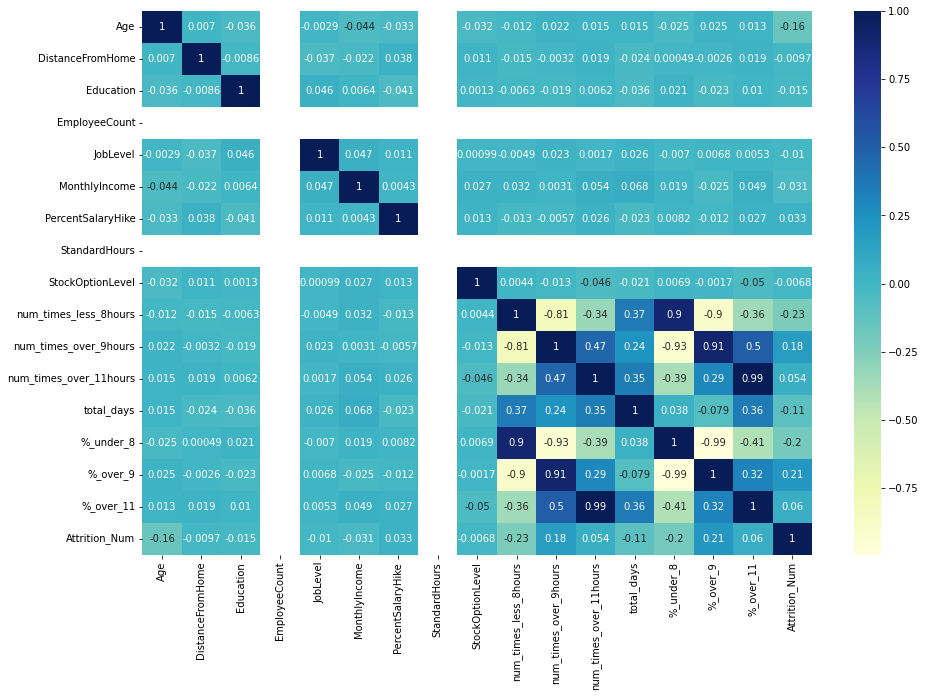

In [ ]:
#create a function to explore correlation of all variables
def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
    
correlation_heatmap(gen_df)

No variables seem to have even a moderate correlation on each other. There doesn't seem to be any multi-collinearity to be worried about.

No variable has a large correlation on attrition, either. Age seems to be the largest absolute value, with -0.16.

In [ ]:
#identify the target varible for the barcharts
target_variable = 'Attrition'

#identify the variables to exclude from barchart
excluded_variables = ('EmployeeID','MonthlyIncome')

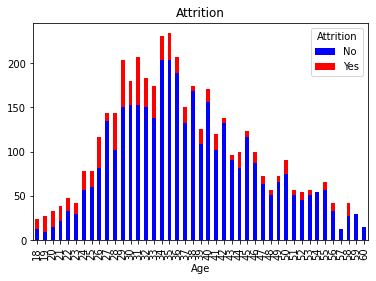

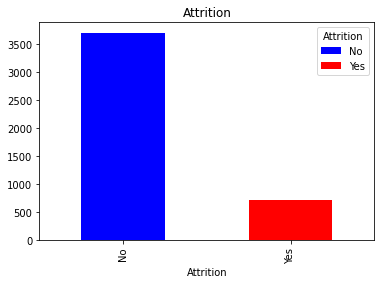

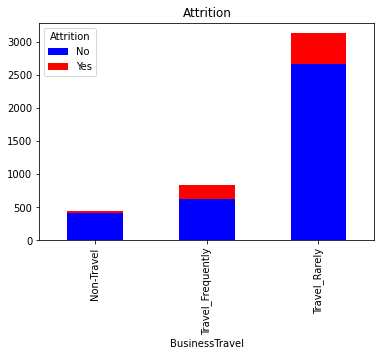

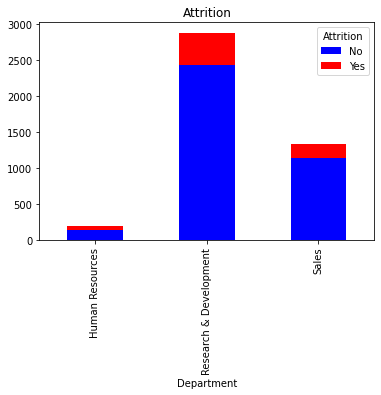

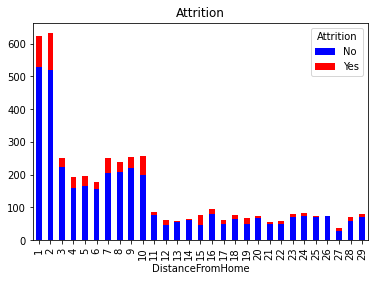

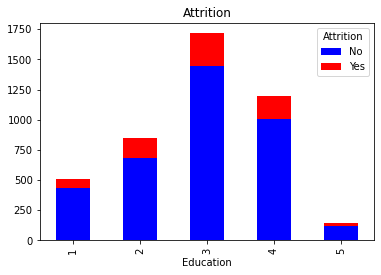

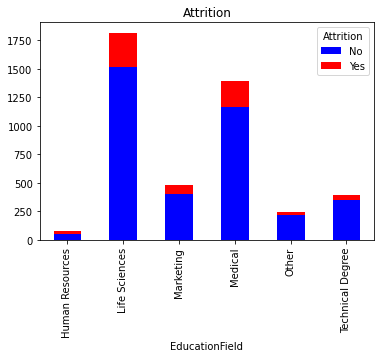

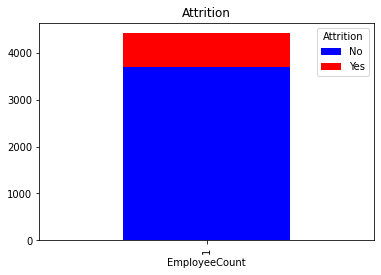

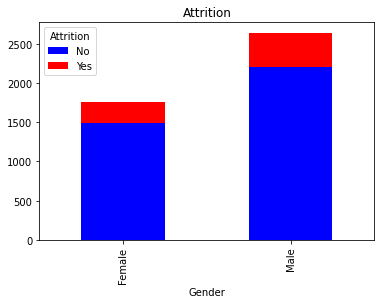

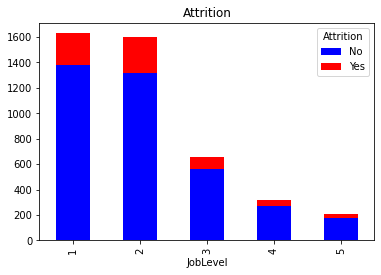

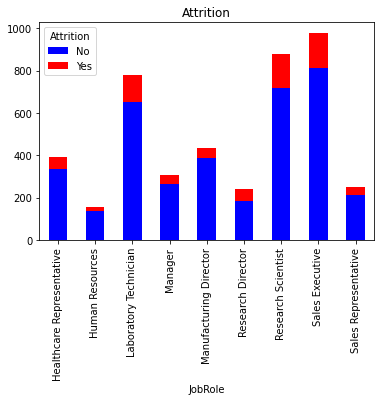

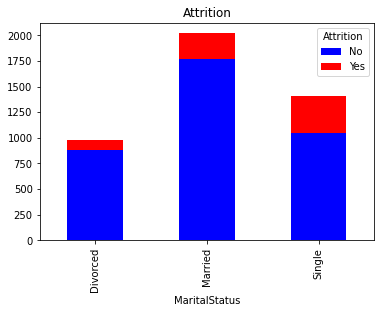

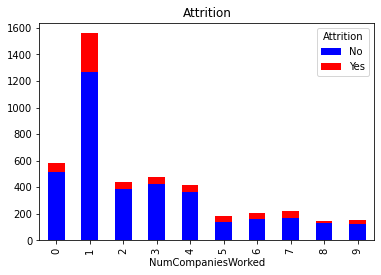

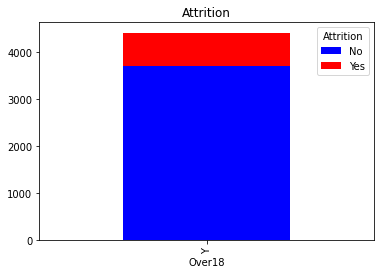

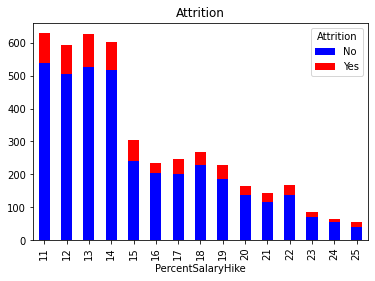

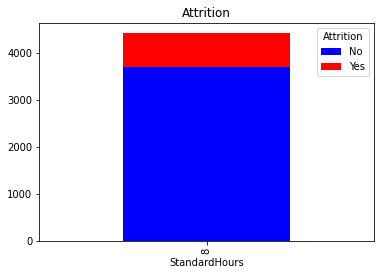

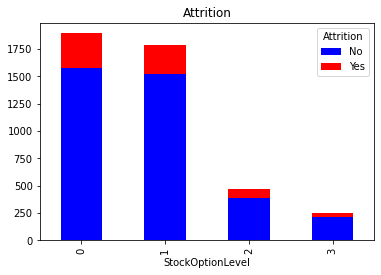

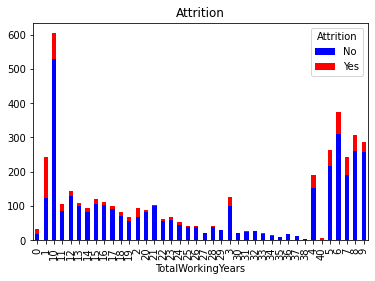

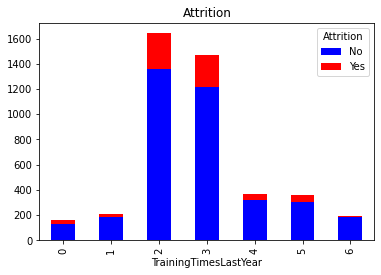

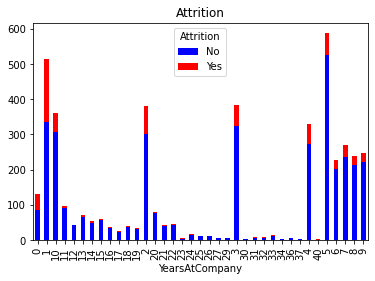

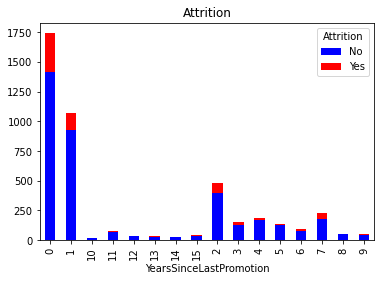

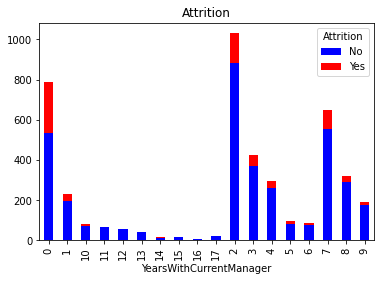

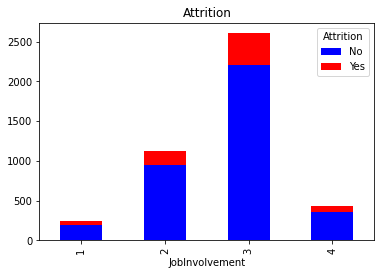

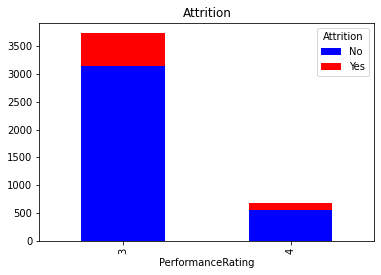

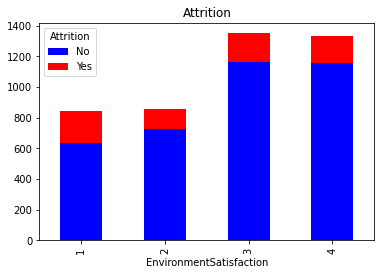

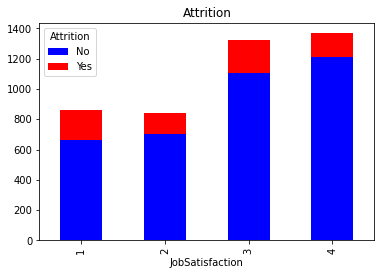

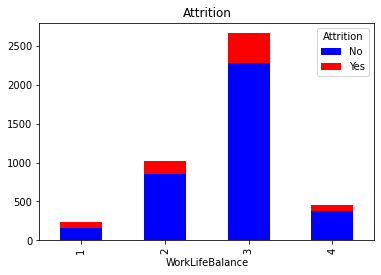

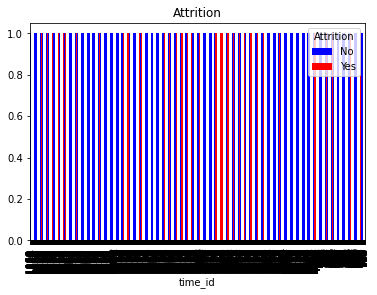

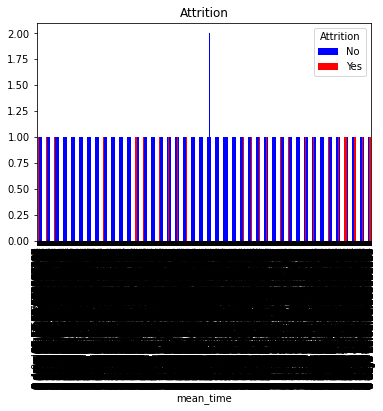

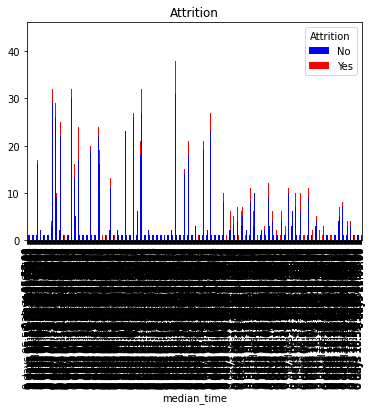

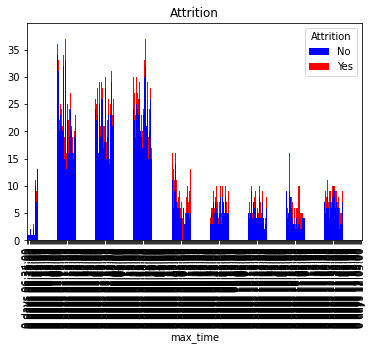

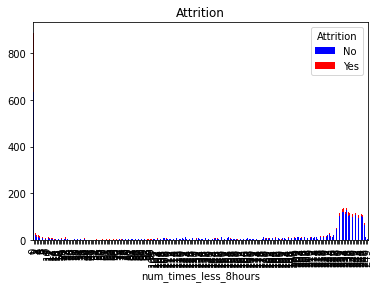

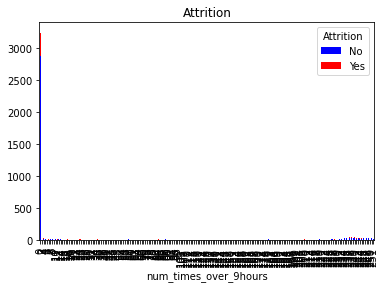

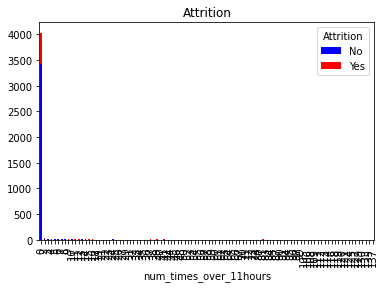

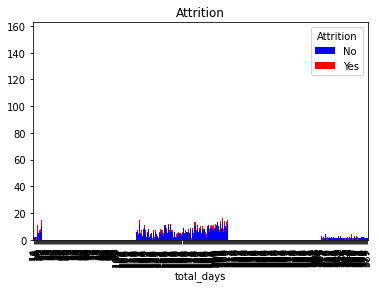

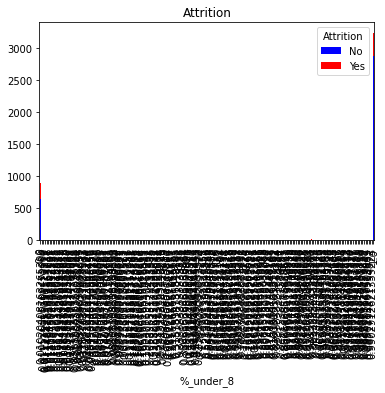

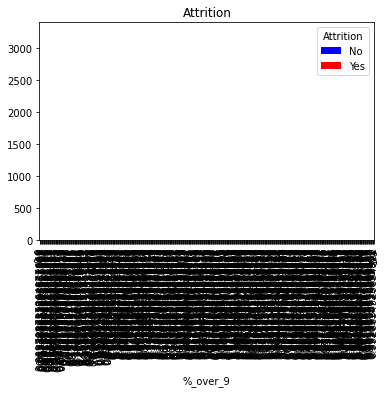

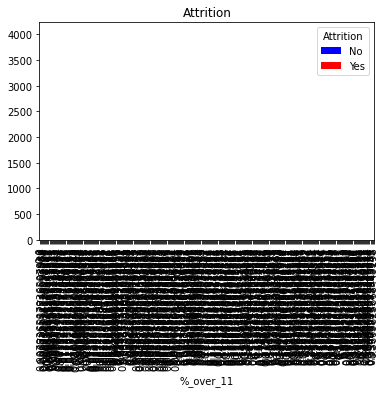

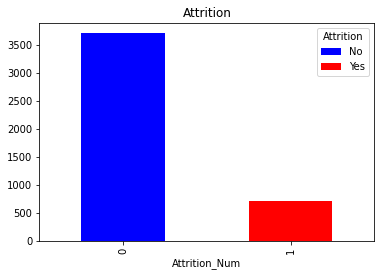

In [ ]:
#create function to produce barcharts by attrition
def stacked_barchart(df):
    #place column names into an object
    col_names = df.columns
    #iterate through column names
    for name in col_names:
        if name in excluded_variables:
            pass
        else:
            #create the stacked barchart for each attritubte
            stacked_bar = pd.crosstab(df[name], df[target_variable])
            stacked_bar.plot(kind='bar', stacked = True
                 , title ='Attrition', color=['blue', 'red'])

#call the function with the dataframe
stacked_barchart(gen_df)   

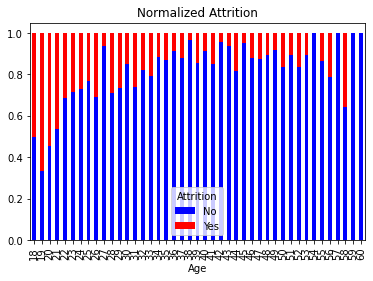

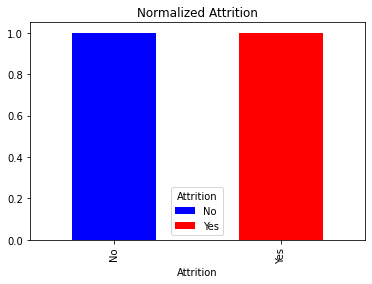

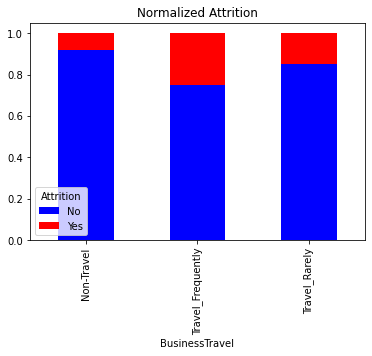

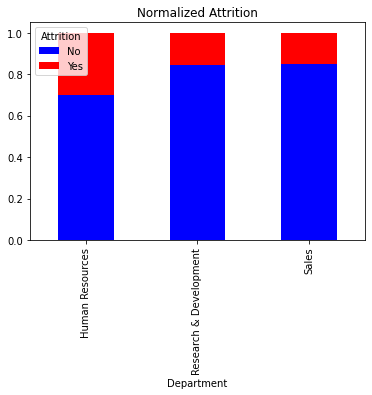

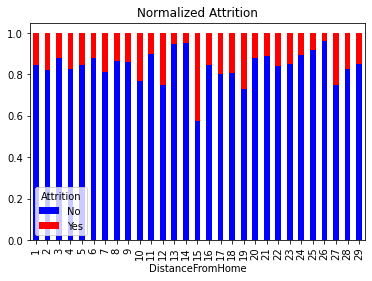

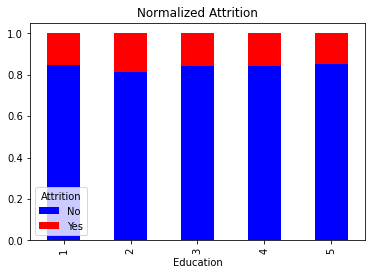

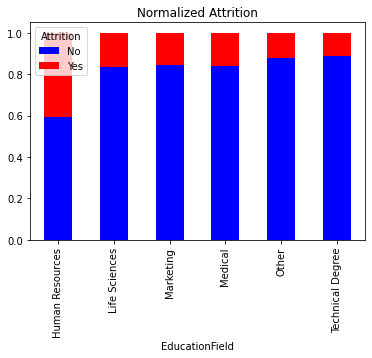

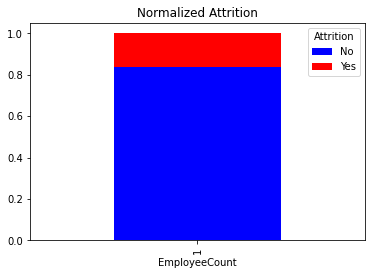

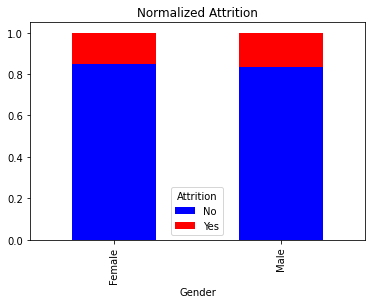

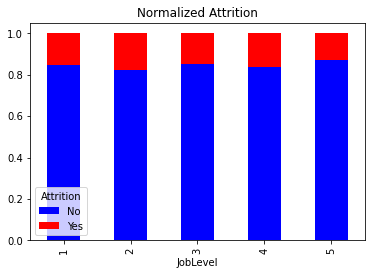

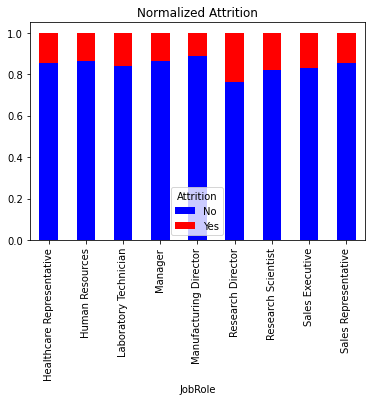

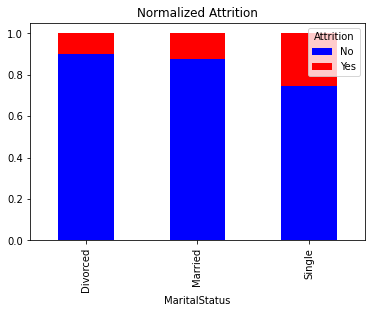

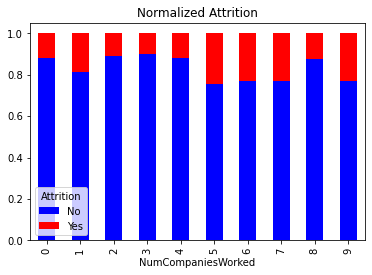

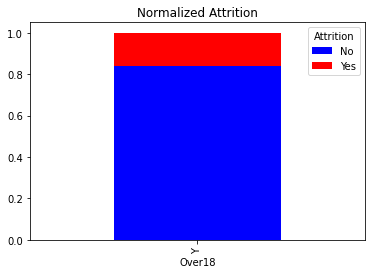

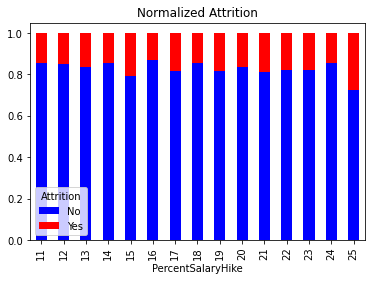

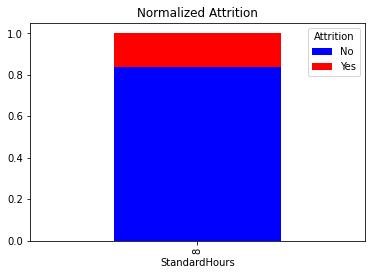

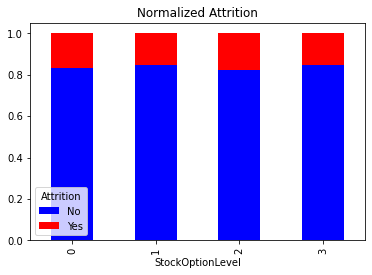

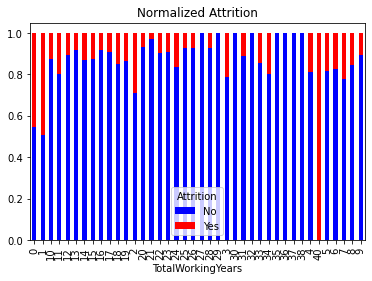

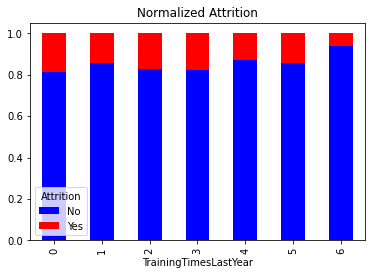

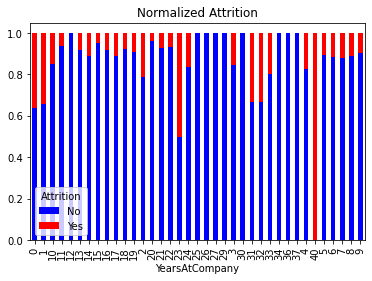

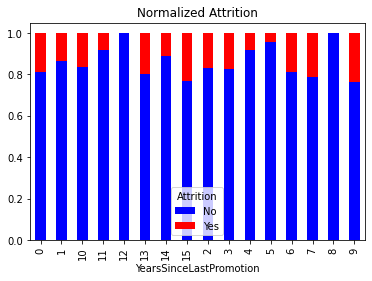

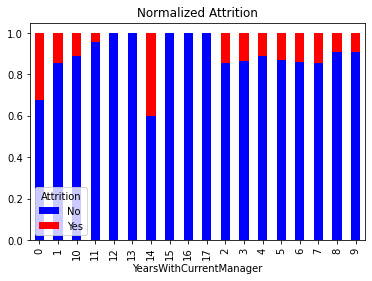

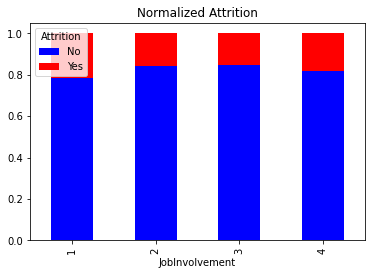

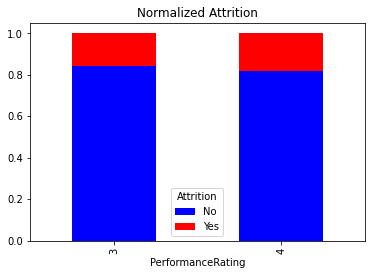

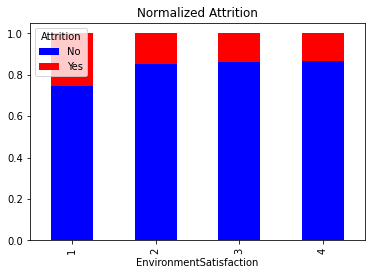

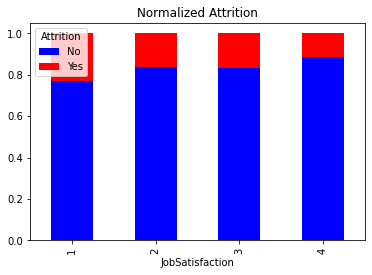

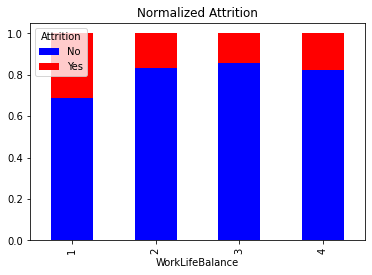

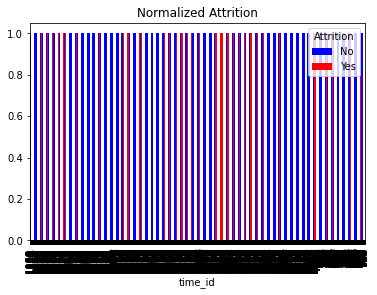

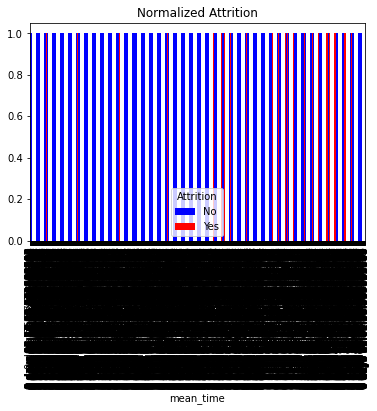

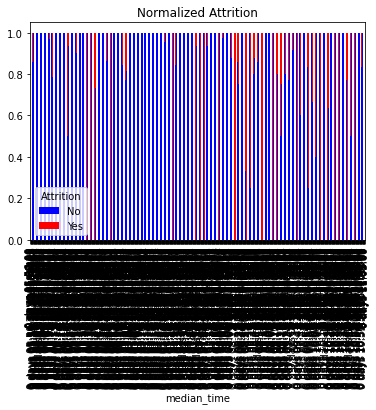

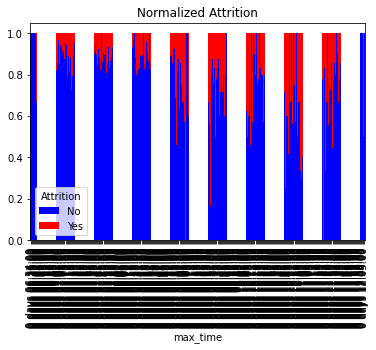

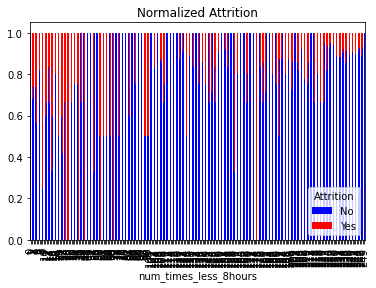

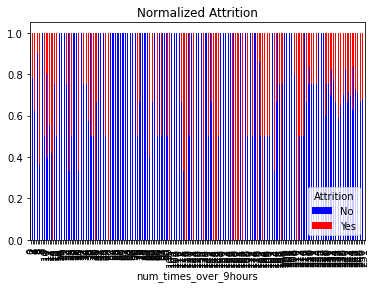

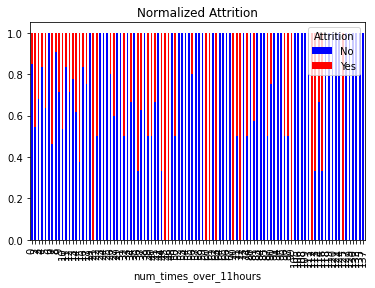

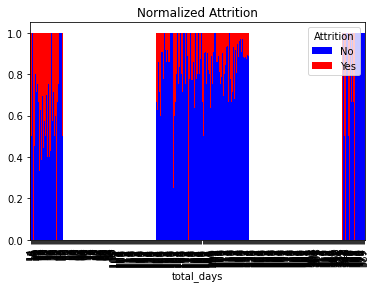

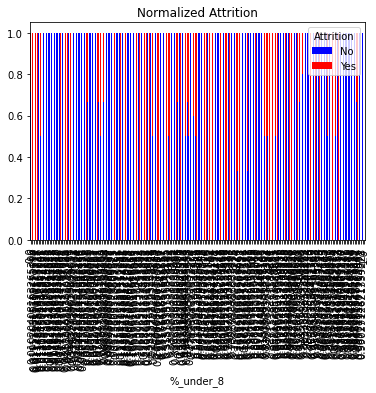

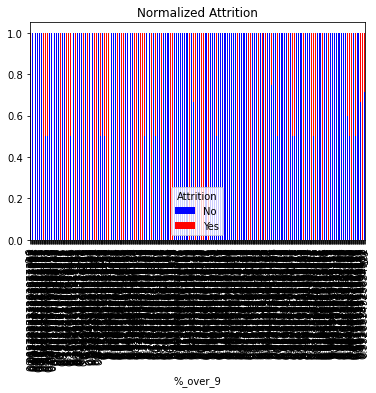

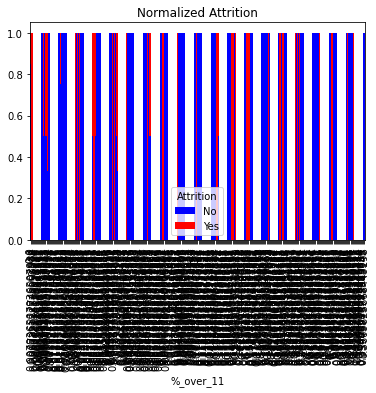

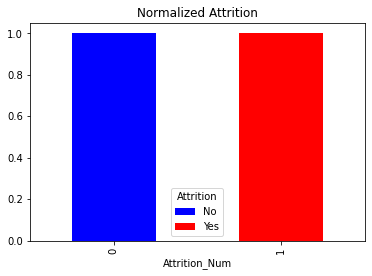

In [ ]:
def normalized_barchart(df):
        #place column names into an object
    col_names = df.columns
    #iterate through column names
    for name in col_names:
        if name in excluded_variables:
            pass
        else:
            stacked_bar = pd.crosstab(df[name], df[target_variable])
            stacked_bar_norm = stacked_bar.div(stacked_bar.sum(1),axis=0)
            stacked_bar_norm.plot(kind='bar',stacked=True, 
                      title='Normalized Attrition', color=['blue', 'red'])

#call the function with the dataframe
normalized_barchart(gen_df)  

## Takeaways from the above charts:

Attrition is imbalanced -- we will need to balance the class prior to any modeling.

Some initial assumptions/hypotheses seem to be correct.

### Below are all the observations: 

It seems the higher the job satisfaction, the lower attrition rate. Also, the less work life balance, it seems there is a high attrition rate, although, when people rate their work-life balance very high, the attrition rate is worse than middle level balance (2 and 3). Similarly, a low environment satisfaction score has a higher turnover rate, but anything better than a 1 is about the same.

People new to the company, within the first 2 years (Year 0 or 1 at the company), seem to have high attrition rates. Similarly with total working years, and especially with age. People 21 or less seem to have rates nearing 50% attrition. People who are single also tend to have higher attrition rates than divorced or married people. 

Finally, the other two variables that seem to have an impact on attrition are the departments they’re in – with HR seemingly having the highest attrition rate. And, people who travel frequently, have a much higher attrition rate than non-travelers or rare travelers.

Some variables, though, don’t seem to have a significant difference, like job involvement from a manager or performance rating for them. Education level, distance from home, and gender neither seem to have an impact on attrition in this early EDA.

Attrition at 40 years on the job is 100% - I think we need to account for attrition versus retirment, and perhaps remove those persons from the data. 

Overall, there don't appear to be any outliers within the data. There are those few nulls that will need to be handled - NumCompaniesWorked and TotalWorkingYears.


# Data Preparation and Cleaning

### Missing Values

In [ ]:
# Handling the nulls

# viewing charts above, there are very little nulls compared to the total count 

null_cols = ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

total_df[null_cols].isna().sum()

NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

There are only 95 nulls in NumCompaniesWorked and 45 in TotalWorkingYears. As there are 22,050 total data points, these make up less than .5% of the total data. -- need to update, as there are 4410 data points

Looking at NumCompaniesWorked, it may make sense that nulls point to the person working at 0 companies prior to this one, and similarly for TotalWorkingYears, as people who haven't worked before may leave that blank when filling out their information.

We can either impute the nulls with 0s, or get rid of them entirely.

In [ ]:
## Let's see what other columns may show when these nulls appear

total_df.loc[total_df['NumCompaniesWorked'].isna() == True][['Age', 'TotalWorkingYears', 'YearsAtCompany']].head()

,Age,TotalWorkingYears,YearsAtCompany
115,27,5,5
210,52,18,10
343,40,10,1
476,22,4,4
647,29,9,7


It seems some employees indeed have only worked for this company -- where total working years and years at company are equal. For those, I think it is safe to add 0 for nulls. For the rest, we have to decide a strategy moving forward.

In [ ]:
total_df['NumCompaniesWorked'] = np.where((total_df['NumCompaniesWorked'].isnull() & total_df['TotalWorkingYears'] == total_df['YearsAtCompany']),
                                            0, total_df['NumCompaniesWorked'])

In [ ]:
# let's check for TotalWorkingYears now

total_df.loc[total_df['TotalWorkingYears'].isna() == True][['Age', 'NumCompaniesWorked', 'YearsAtCompany']].head()

,Age,NumCompaniesWorked,YearsAtCompany
23,42,1,20
137,43,7,3
308,47,4,5
574,37,7,6
1517,36,7,9


No much we can deduce really to understand totalworking years, unless numcomanies worked for is 0, then we can just use years at company as totalworkingyears and drop the rest.


In [ ]:
# running similar code as above to clean nulls where we can

total_df['TotalWorkingYears'] = np.where(total_df['TotalWorkingYears'].isnull() & total_df['NumCompaniesWorked'] == 0,
                                            total_df['YearsAtCompany'], total_df['TotalWorkingYears'])

In [ ]:
# checking for survey data

total_df.loc[total_df['EnvironmentSatisfaction'].isna() == True][['Age', 'TotalWorkingYears', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']].head()

,Age,TotalWorkingYears,YearsAtCompany,JobSatisfaction,WorkLifeBalance
11,36,15,15,4,3
111,31,2,2,2,3
195,26,7,7,3,2
300,32,10,10,4,3
405,21,1,1,4,2


In [ ]:
total_df.loc[total_df['JobSatisfaction'].isna() == True][['Age', 'TotalWorkingYears', 'YearsAtCompany', 'EnvironmentSatisfaction', 'WorkLifeBalance']].head()

,Age,TotalWorkingYears,YearsAtCompany,EnvironmentSatisfaction,WorkLifeBalance
40,36,1,1,3,3
124,26,6,6,3,3
313,26,2,2,1,3
586,30,10,10,3,3
859,34,2,2,2,2


In [ ]:
total_df.loc[total_df['WorkLifeBalance'].isna() == True][['Age', 'TotalWorkingYears', 'YearsAtCompany', 'JobSatisfaction', 'EnvironmentSatisfaction']].head()

,Age,TotalWorkingYears,YearsAtCompany,JobSatisfaction,EnvironmentSatisfaction
84,31,11,11,4,3
273,32,7,7,4,3
483,42,1,1,3,4
609,50,2,2,1,4
735,25,3,3,3,1


### IDEAS for Null Imputation or Removals

As shown above for workingyears and yearsatcompany, impute with 0 or years at company depending on some other conditional, respectively.

For the survey data, perhaps, we can do some type of model with the rest of the data (not limited to survey data) to predict the other. This can also aid in our understanding of what causes the other types of 'satisfaction'

In [ ]:
# utilizing KNNImputer to impute rest of nulls

survey_missing = total_df[['Age', 'TotalWorkingYears', 'YearsAtCompany', 'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked']]

imputer = KNNImputer(n_neighbors = 3, weights = "uniform")
imputed_data = imputer.fit_transform(survey_missing)

In [ ]:
total_df[['Age', 'TotalWorkingYears', 'YearsAtCompany', 'JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked']] = imputed_data

In [ ]:
# checking to ensure all nulls are removed

total_df[null_cols].isna().sum()

NumCompaniesWorked         0
TotalWorkingYears          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [ ]:
total_df.dtypes

Age                                float64
Attrition                           object
BusinessTravel                      object
Department                          object
DistanceFromHome                     int64
Education                            int64
EducationField                      object
EmployeeCount                        int64
EmployeeID                          object
Gender                              object
JobLevel                             int64
JobRole                             object
MaritalStatus                       object
MonthlyIncome                        int64
NumCompaniesWorked                 float64
Over18                              object
PercentSalaryHike                    int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                  float64
TrainingTimesLastYear               object
YearsAtCompany                     float64
YearsSinceLastPromotion             object
YearsWithCu

In [ ]:
# now that nulls are taken care of, let's convert all these to integers

total_df[['YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrentManager',
          'JobInvolvement', 'PerformanceRating', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
          'JobSatisfaction', 'WorkLifeBalance']] = total_df[['YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrentManager',
                                                             'JobInvolvement', 'PerformanceRating', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
                                                             'JobSatisfaction', 'WorkLifeBalance']].astype(int)

## Outliers and Skewed Distributions

In [ ]:
# viewing any skew or non-normal distributions

total_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,median_time,max_time,num_times_less_8hours,num_times_over_9hours,num_times_over_11hours,total_days,%_under_8,%_over_9,%_over_11,Attrition_Num
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410,4410,4410,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.693348,15.209524,8.0,0.793878,7.008088,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.723129,2.726757,2.758277,0 days 07:42:02.825410458,0 days 07:42:02.193344018,0 days 08:32:25.034013605,161.428571,44.765533,3.020408,209.214512,0.766892,0.223348,0.009760,0.161224
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.495876,3.659108,0.0,0.851883,6.125347,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.091727,1.100912,0.706115,0 days 01:20:24.753405273,0 days 01:20:25.093578524,0 days 01:20:33.972398146,100.052592,89.089876,14.413680,62.721840,0.413879,0.397780,0.043657,0.367780
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0 days 05:57:03.171806167,0 days 05:56:00,0 days 06:34:00,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,3.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,0 days 06:40:23.351099267,0 days 06:40:00,0 days 07:31:00,28.000000,0.000000,0.000000,202.000000,0.875947,0.000000,0.000000,0.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,5.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0 days 07:24:24.707390247,0 days 07:24:21.211453744,0 days 08:15:00,229.000000,0.000000,0.000000,233.000000,1.000000,0.000000,0.000000,0.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,9.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,0 days 08:22:05.840293105,0 days 08:22:00,0 days 09:11:00,237.750000,3.000000,0.000000,241.000000,1.000000,0.124053,0.000000,0.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0 days 11:01:53.076923077,0 days 11:03:00,0 days 12:05:00,249.000000,251.000000,137.000000,387.000000,1.000000,1.000000,0.360963,1.000000


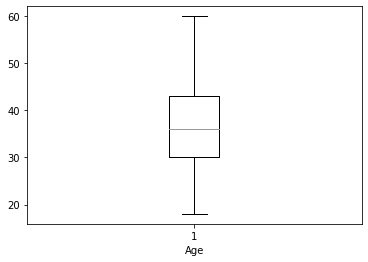

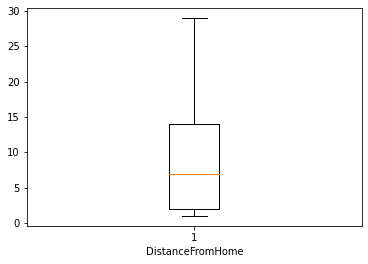

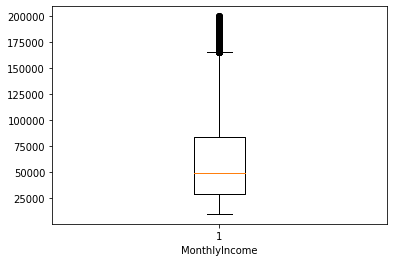

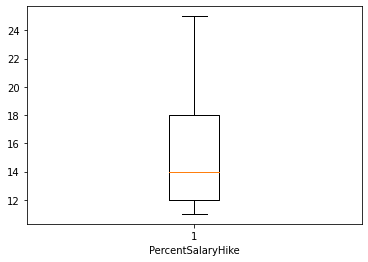

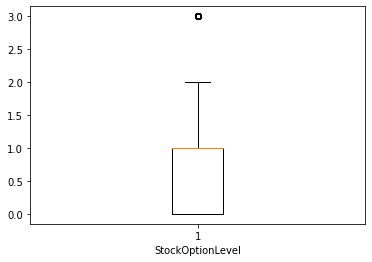

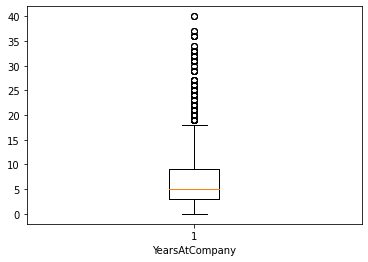

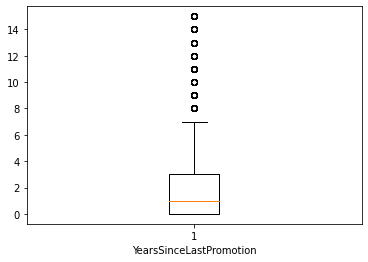

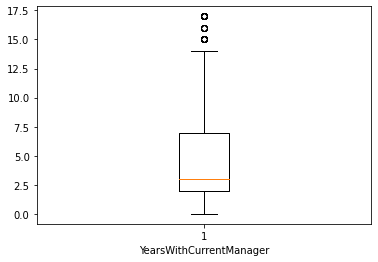

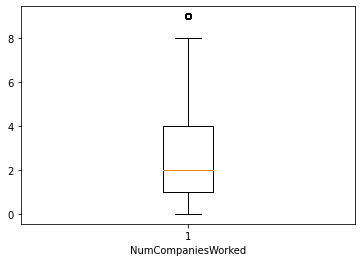

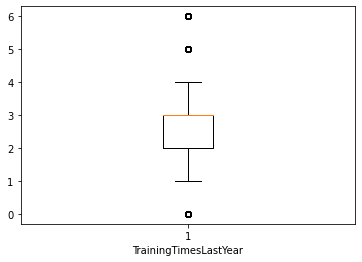

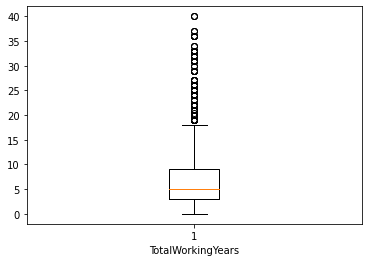

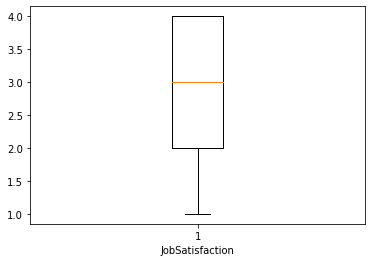

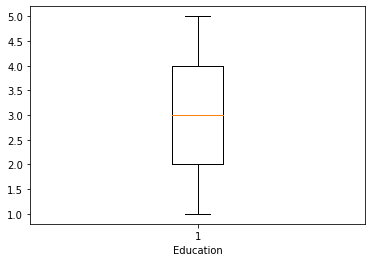

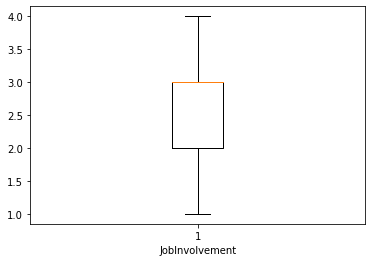

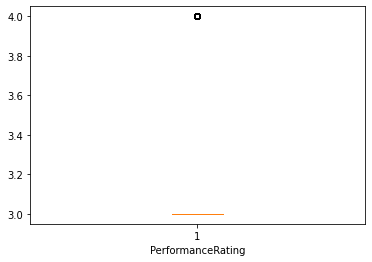

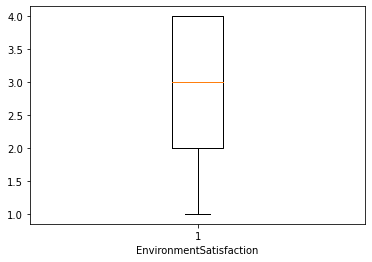

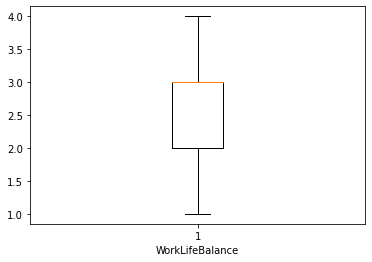

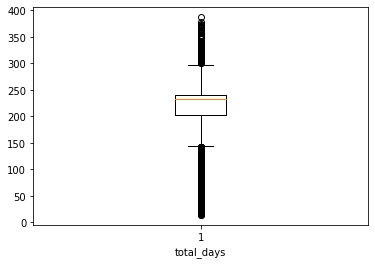

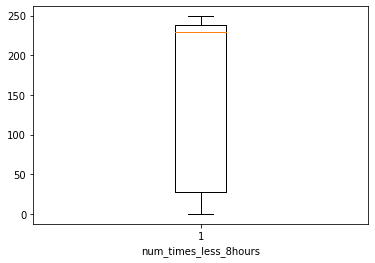

In [ ]:
# only looking at possibly skewed columns based on descriptive stats and previous EDA

num_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel', 'YearsAtCompany',
            'YearsSinceLastPromotion', 'YearsWithCurrentManager', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'TotalWorkingYears',
            'JobSatisfaction', 'Education', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'WorkLifeBalance',
            'total_days', 'num_times_less_8hours']

for col in num_cols:
  plt.figure()
  plt.boxplot(total_df[col])
  plt.xlabel(col)

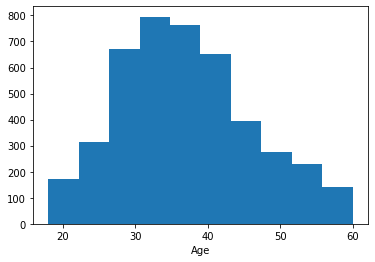

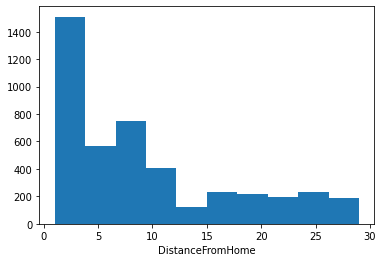

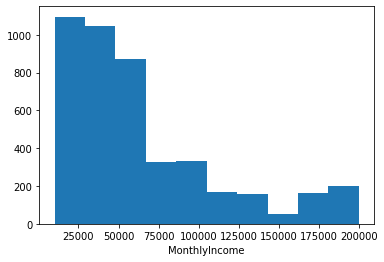

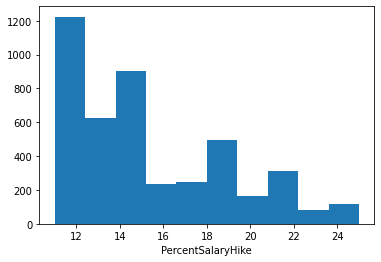

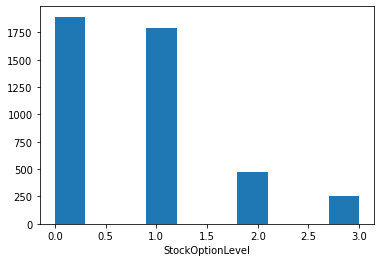

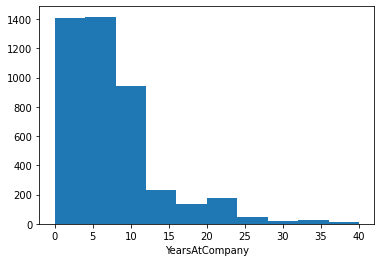

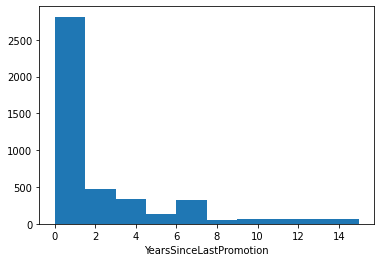

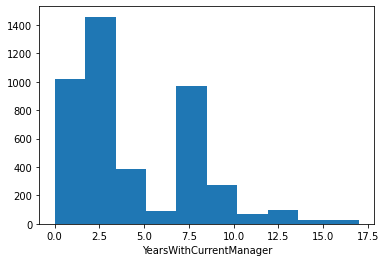

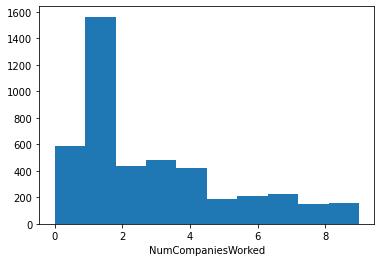

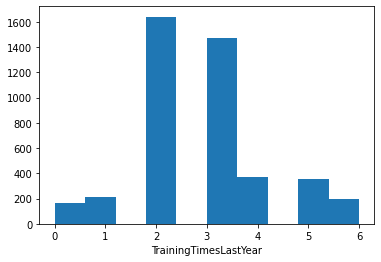

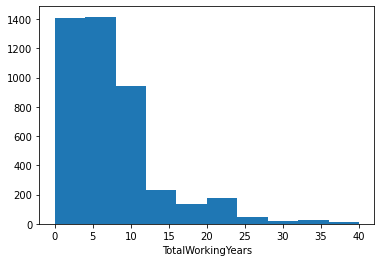

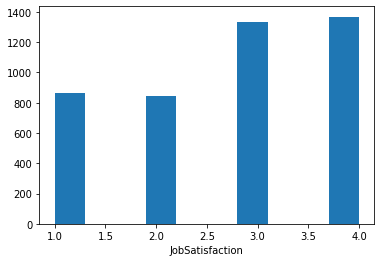

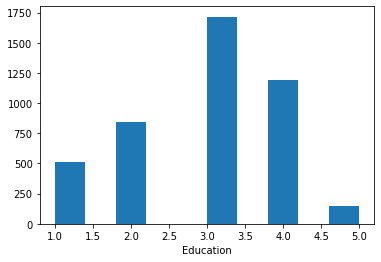

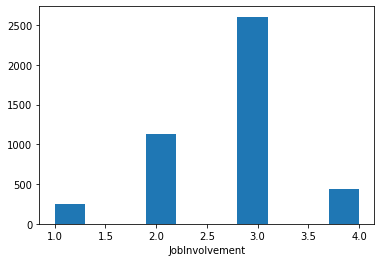

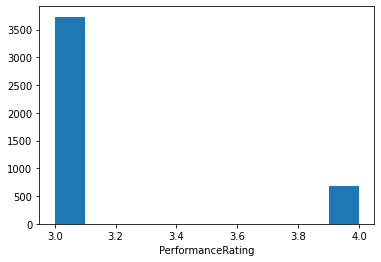

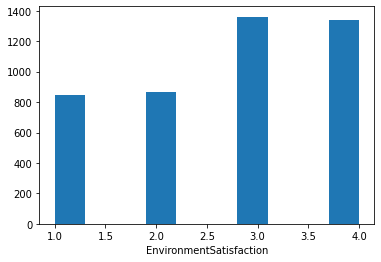

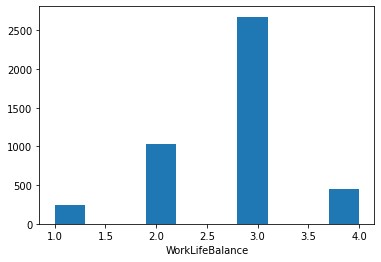

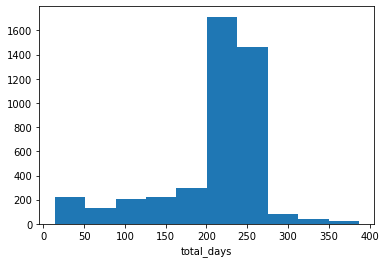

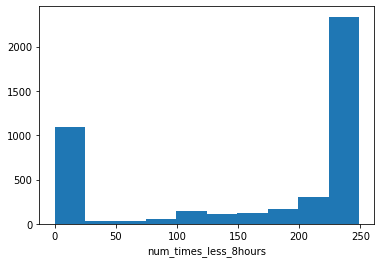

In [ ]:
for col in num_cols:
  plt.figure()
  plt.hist(total_df[col])
  plt.xlabel(col)

### Columns with possible outliers:

StockOptionLevel; YearsWithCurrentManager; TrainingTimesLastYear; num_times_less_8_hours

### Skewed columns include:

YearsSinceLastPromotion; YearsAtCompany; MonthlyIncome; PercentSalaryHike; DistanceFromHome, YearsWithCurrentManager; num_times_less_8hours



In [ ]:
# removing outliers

outlier_var = ['StockOptionLevel', 'YearsWithCurrentManager', 'TrainingTimesLastYear', 
               'NumCompaniesWorked', 'num_times_less_8hours']

for i in outlier_var:
  trans = 'clipped_' + i

  # creating upper limit of .95 quantile
  up_lim = total_df[i].quantile(0.95)

  # lower limit of .05
  low_lim = total_df[i].quantile(0.05)

  total_df[trans] = total_df[i].clip(low_lim, up_lim, axis = 0)

  print(total_df[i].describe())
  print(total_df[trans].describe())


count    4410.000000
mean        0.793878
std         0.851883
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64
count    4410.000000
mean        0.793878
std         0.851883
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: clipped_StockOptionLevel, dtype: float64
count    4410.000000
mean        4.123129
std         3.567327
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrentManager, dtype: float64
count    4410.000000
mean        3.982993
std         3.238383
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        10.000000
Name: clipped_YearsWithCurrentManager, dtype: float64
count    4410.000000
mean        2.799320
std         1.288978
min         0.000000
25%         2.000000
50%         3.000000
75%         3.00

It doesn't appear if StockOptionLevel lost the outliers; those stayed intact.

Time to scale all variables that need it.





In [ ]:
# creating a copy of total_df to do transformations on

trans_df = total_df

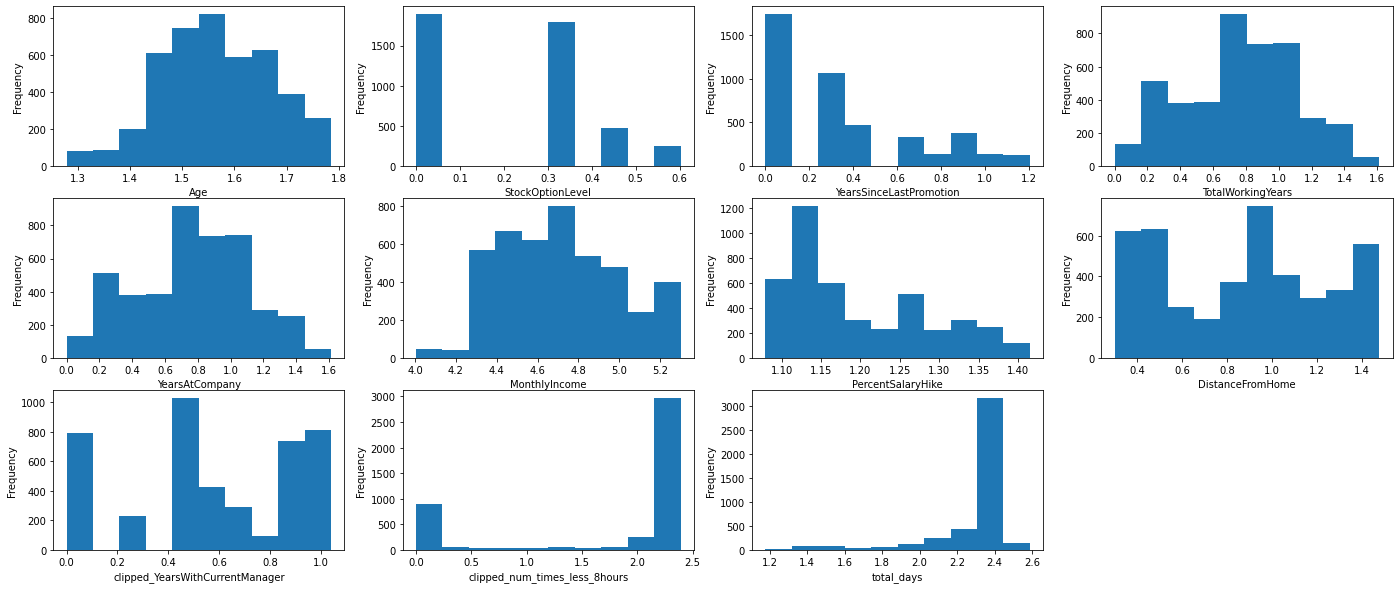

In [ ]:
# Log transformation for skewed data

skewed_cols = ['Age', 'StockOptionLevel', 'YearsSinceLastPromotion', 'TotalWorkingYears',
               'YearsAtCompany', 'MonthlyIncome', 'PercentSalaryHike', 'DistanceFromHome', 'clipped_YearsWithCurrentManager',
               'clipped_num_times_less_8hours', 'total_days']

fig = plt.figure(figsize = (24,10))

for i in range(len(skewed_cols)):
  var = skewed_cols[i]
  transformed = "log_" + var
  trans_df[transformed] = np.log10(trans_df[var]+1)

  sub = fig.add_subplot(3, 4, i + 1)
  sub.set_xlabel(var)
  trans_df[transformed].plot(kind = 'hist')

In [ ]:
# Min-Max Scaler - not normally distributed

mms_var = ['log_PercentSalaryHike', 'log_DistanceFromHome', 'log_clipped_YearsWithCurrentManager', 'log_clipped_num_times_less_8hours',
           'log_total_days']

mms = MinMaxScaler(feature_range = (-2, 2)).fit(trans_df[mms_var]) # setting range from -2 to 2 to stay in line with the scale of standardscaler in next cell

trans_df[mms_var] = mms.transform(trans_df[mms_var])

In [ ]:
trans_df[mms_var].head()

,log_PercentSalaryHike,log_DistanceFromHome,log_clipped_YearsWithCurrentManager,log_clipped_num_times_less_8hours,log_total_days
0,-2.000000,-0.149572,-2.000000,1.969848,1.388650
1,1.585909,0.518045,0.684751,1.838609,1.166540
2,-0.511713,1.245471,0.312519,2.000000,1.439680
3,-2.000000,-1.401097,0.988887,1.979025,1.404183
4,-1.585909,0.518045,0.684751,1.536597,0.655412


In [ ]:
# changing values for education level to be more sensical for what they represent

trans_df = trans_df.replace({'Education': {1: 9, 2: 12, 3: 16, 4: 18, 5: 21}})

In [ ]:
# standard scaler - normally distributed or Likert Scale

norm_var = ['log_Age', 'log_YearsSinceLastPromotion', 'log_TotalWorkingYears',
               'log_YearsAtCompany', 'log_MonthlyIncome', 'JobInvolvement',
            'PerformanceRating', 'StockOptionLevel', 'WorkLifeBalance', 'clipped_TrainingTimesLastYear',
            'JobSatisfaction', 'Education', 'clipped_NumCompaniesWorked',
            'EnvironmentSatisfaction']


ss = StandardScaler().fit(trans_df[norm_var])

trans_df[norm_var] = ss.transform(trans_df[norm_var])

In [ ]:
trans_df[norm_var].head()

,log_Age,log_YearsSinceLastPromotion,log_TotalWorkingYears,log_YearsAtCompany,log_MonthlyIncome,JobInvolvement,PerformanceRating,StockOptionLevel,WorkLifeBalance,clipped_TrainingTimesLastYear,JobSatisfaction,Education,clipped_NumCompaniesWorked,EnvironmentSatisfaction
0,1.418891,-0.973342,-1.478347,-1.478408,1.398738,0.379672,-0.426230,-0.932014,-1.073992,1.972466,1.156665,-0.995377,-0.687493,0.253637
1,-0.578938,-0.117271,-0.026360,-0.026394,-0.319624,-1.026167,2.346151,0.241988,1.758727,0.185944,-0.660216,-1.950055,-1.102152,0.253637
2,-0.452315,-0.973342,-0.026360,-0.026394,1.982468,0.379672,-0.426230,2.589994,-2.490352,-0.707317,-0.660216,0.913980,-0.687493,-0.662447
3,0.235100,1.594870,0.509525,0.509502,0.713645,-1.026167,-0.426230,2.589994,0.342367,1.972466,1.156665,1.868658,0.141824,1.169721
4,-0.452315,-0.973342,0.177374,0.177344,-1.195006,0.379672,-0.426230,1.415991,0.342367,-0.707317,-1.568656,-1.950055,0.556482,1.169721


All numerical data, including survey data on scale, should be mostly normally distributed and/or scaled accordingly at this point. 




Other areas to check in data preparation

Inconsistent entries

Duplicate entries

Encoding

Binning

Merging Multiple Sources

Data Partitioning

Feature Engineering

In [ ]:
## One hot encoding

# specifying categorical columns to encode
cat_col = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus',
           'Attrition', 'Gender']

# getting one hot encodings of above columns
one_hot = pd.get_dummies(trans_df[cat_col], drop_first = True) # ensuring we do not double count a column

# drop the columns we've encoded
trans_df = trans_df.drop(cat_col, axis =1)

# joining encoded DF
trans_df = trans_df.join(one_hot)

trans_df.head()


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrentManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,time_id,mean_time,median_time,max_time,num_times_less_8hours,num_times_over_9hours,num_times_over_11hours,total_days,%_under_8,%_over_9,%_over_11,Attrition_Num,clipped_StockOptionLevel,clipped_YearsWithCurrentManager,clipped_TrainingTimesLastYear,clipped_NumCompaniesWorked,clipped_num_times_less_8hours,log_Age,log_StockOptionLevel,log_YearsSinceLastPromotion,log_TotalWorkingYears,log_YearsAtCompany,log_MonthlyIncome,log_PercentSalaryHike,log_DistanceFromHome,log_clipped_YearsWithCurrentManager,log_clipped_num_times_less_8hours,log_total_days,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition_Yes,Gender_Male
0,51.0,6,-0.995377,1,1,1,131160,1.0,Y,11,8,-0.932014,1.0,6,1,0,0,0.379672,-0.426230,0.253637,1.156665,-1.073992,1,0 days 07:22:26.896551724,0 days 07:23:00,0 days 07:57:00,235,0,0,235,1.0,0.0,0.0,0,0,0.0,1.972466,-0.687493,235.0,1.418891,0.000000,-0.973342,-1.478347,-1.478408,1.398738,-2.000000,-0.149572,-2.000000,1.969848,1.388650,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,31.0,10,-1.950055,1,2,1,41890,0.0,Y,23,8,0.241988,5.0,3,5,1,4,-1.026167,2.346151,0.253637,-0.660216,1.758727,2,0 days 07:43:03.813559322,0 days 07:43:00,0 days 08:34:00,196,0,0,196,1.0,0.0,0.0,1,1,4.0,0.185944,-1.102152,196.0,-0.578938,0.301030,-0.117271,-0.026360,-0.026394,-0.319624,1.585909,0.518045,0.684751,1.838609,1.166540,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,32.0,17,0.913980,1,3,4,193280,1.0,Y,15,8,2.589994,5.0,2,5,0,3,0.379672,-0.426230,-0.662447,-0.660216,-2.490352,3,0 days 07:00:48.595041322,0 days 06:59:00,0 days 07:59:00,245,0,0,245,1.0,0.0,0.0,0,3,3.0,-0.707317,-0.687493,245.0,-0.452315,0.602060,-0.973342,-0.026360,-0.026394,1.982468,-0.511713,1.245471,0.312519,2.000000,1.439680,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
3,38.0,2,1.868658,1,4,3,83210,3.0,Y,11,8,2.589994,8.0,5,8,7,5,-1.026167,-0.426230,1.169721,1.156665,0.342367,4,0 days 07:11:36.510638298,0 days 07:11:00,0 days 07:53:00,238,0,0,238,1.0,0.0,0.0,0,3,5.0,1.972466,0.141824,238.0,0.235100,0.602060,1.594870,0.509525,0.509502,0.713645,-2.000000,-1.401097,0.988887,1.979025,1.404183,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,32.0,10,-1.950055,1,5,1,23420,4.0,Y,12,8,1.415991,6.0,2,6,0,4,0.379672,-0.426230,1.169721,-1.568656,0.342367,5,0 days 08:00:22.530612245,0 days 07:58:00,0 days 08:50:00,129,0,0,129,1.0,0.0,0.0,0,2,4.0,-0.707317,0.556482,129.0,-0.452315,0.477121,-0.973342,0.177374,0.177344,-1.195006,-1.585909,0.518045,0.684751,1.536597,0.655412,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1


### More Feature Engineering

In [ ]:
# Creating a feature for age joining the overall workforce

trans_df['AgeBeganWorking'] = trans_df['Age'] - trans_df['TotalWorkingYears']


In [ ]:
# another feature could be percentage of career at company?

trans_df['PercentageOfCareerAtCompany'] = trans_df['YearsAtCompany'] / trans_df['TotalWorkingYears']

In [ ]:
# utilizing time data to find total days per year

trans_df['WorkingDaysPerYear'] = trans_df['total_days'] / trans_df['YearsAtCompany']


In [ ]:
trans_df['total_days']

0       235
1       196
2       245
3       238
4       129
5       293
6       233
7       246
8       231
9       237
10       26
11      244
12      192
13      220
14      244
15      240
16      230
17      379
18      235
19      192
20      207
21      236
22       26
23      245
24      232
25      223
26      358
27      214
28      362
29      233
30      241
31      245
32      251
33      246
34      243
35      238
36      245
37      233
38      230
39      205
40      247
41      211
42      245
43      243
44      245
45      240
46      209
47      174
48      230
49      231
50      329
51      152
52      242
53      233
54       32
55      240
56      368
57      189
58      246
59      147
60      278
61      253
62      234
63      246
64      227
65      287
66      235
67      230
68      231
69      249
70      238
71      246
72      238
73      198
74      235
75      241
76      245
77      234
78      243
79      242
80      214
81      247
82      239
83  

In [ ]:
for col in new_feat:
  plt.figure()
  plt.boxplot(trans_df[col])
  plt.xlabel(col)

NameError: ignored

In [ ]:
# checking out columns to know which to get rid of

trans_df.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrentManager', 'JobInvolvement',
       'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'time_id', 'mean_time', 'median_time', 'max_time',
       'num_times_less_8hours', 'num_times_over_9hours',
       'num_times_over_11hours', 'total_days', '%_under_8', '%_over_9',
       '%_over_11', 'Attrition_Num', 'clipped_StockOptionLevel',
       'clipped_YearsWithCurrentManager', 'clipped_TrainingTimesLastYear',
       'clipped_NumCompaniesWorked', 'clipped_num_times_less_8hours',
       'log_Age', 'log_StockOptionLevel', 'log_YearsSinceLastPromotion',
       'log_TotalWorkingYears', 'log_YearsAtCompany', 'log_MonthlyIncome',
 

We can likely get rid of non-transformed variables here / duplicate variables; and other variables that don't provide information (like, standard hours, over18, and employeecount)

In [ ]:
trans_df.drop(['Age', 'DistanceFromHome', 'StandardHours', 'Over18', 'EmployeeCount', 'TrainingTimesLastYear',
               'StockOptionLevel', 'YearsSinceLastPromotion', 'TotalWorkingYears', 'YearsAtCompany',
               'MonthlyIncome', 'PercentSalaryHike', 'YearsWithCurrentManager', 'clipped_YearsWithCurrentManager',
               'clipped_StockOptionLevel', 'clipped_num_times_less_8hours', 'total_days', 'num_times_less_8hours' ], axis = 1, inplace = True)

KeyError: ignored

In [ ]:
trans_df.columns

Index(['Education', 'EmployeeID', 'JobLevel', 'NumCompaniesWorked',
       'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'time_id', 'mean_time',
       'median_time', 'max_time', 'num_times_over_9hours',
       'num_times_over_11hours', '%_under_8', '%_over_9', '%_over_11',
       'Attrition_Num', 'clipped_TrainingTimesLastYear',
       'clipped_NumCompaniesWorked', 'log_Age', 'log_StockOptionLevel',
       'log_YearsSinceLastPromotion', 'log_TotalWorkingYears',
       'log_YearsAtCompany', 'log_MonthlyIncome', 'log_PercentSalaryHike',
       'log_DistanceFromHome', 'log_clipped_YearsWithCurrentManager',
       'log_clipped_num_times_less_8hours', 'log_total_days',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other'

In [ ]:
trans_df.to_csv('/content/drive/My Drive/MS-ADS Capstone Project/data/clean_df.csv')
total_df.to_csv('/content/drive/My Drive/MS-ADS Capstone Project/data/total_df.csv')

In [ ]:
trans_df.corr()

,Education,JobLevel,NumCompaniesWorked,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,num_times_over_9hours,num_times_over_11hours,%_under_8,%_over_9,%_over_11,Attrition_Num,clipped_TrainingTimesLastYear,clipped_NumCompaniesWorked,log_Age,log_StockOptionLevel,log_YearsSinceLastPromotion,log_TotalWorkingYears,log_YearsAtCompany,log_MonthlyIncome,log_PercentSalaryHike,log_DistanceFromHome,log_clipped_YearsWithCurrentManager,log_clipped_num_times_less_8hours,log_total_days,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition_Yes,Gender_Male,AgeBeganWorking,PercentageOfCareerAtCompany,WorkingDaysPerYear
Education,1.000000,0.049882,-0.014488,-0.016503,-0.039553,-0.041504,-0.007466,-0.003237,-0.019659,0.008304,0.021223,-0.023383,0.011855,-0.016666,0.022264,-0.011792,-0.042753,-0.009798,0.020591,-0.006947,-0.006934,0.006695,-0.042366,-0.015256,0.010668,0.014061,-0.036213,0.004193,0.005059,-0.004961,-0.000960,0.008135,-0.005809,-0.023914,0.046704,0.002361,0.044943,-0.074507,0.048521,-0.008381,5.512849e-02,-0.005613,-0.008698,0.028498,-0.010024,0.026408,-0.016666,-1.891284e-02,-0.043889,0.006476,-0.013995
JobLevel,0.049882,1.000000,-0.009075,-0.012630,-0.002474,-0.024577,-0.016930,-0.026074,0.023414,0.001667,-0.007046,0.006754,0.005260,-0.010290,-0.033186,-0.009054,-0.009749,-0.015640,-0.049344,-0.039451,-0.039483,0.043846,0.014550,-0.031076,-0.034598,-0.008669,0.025546,-0.013697,0.039683,-0.036763,0.020701,0.009053,0.035297,-0.031310,-0.011367,0.001202,0.028870,-0.031566,0.025348,-0.004684,3.220675e-02,0.017455,-0.021969,-0.024790,0.007360,-0.021163,-0.010290,-2.685434e-02,0.039544,-0.015084,0.036083
NumCompaniesWorked,-0.014488,-0.009075,1.000000,0.027095,0.017611,0.014199,-0.055760,-0.009853,-0.012613,0.024811,0.019332,-0.022688,0.023452,0.042506,-0.029693,0.997751,0.302846,0.025369,-0.045645,-0.127516,-0.127425,-0.032489,0.032192,-0.023124,-0.108803,0.021204,0.014660,-0.040082,0.033127,0.051260,-0.028797,0.007228,0.013050,-0.012214,-0.002071,0.012957,0.025006,0.006821,-0.006138,0.004488,1.318987e-02,-0.019595,-0.020361,0.013919,-0.016086,-0.019864,0.042506,-6.644899e-02,0.373324,0.039846,0.099597
JobInvolvement,-0.016503,-0.012630,0.027095,1.000000,0.010699,0.016134,0.003929,-0.018915,-0.006976,0.023387,0.018244,-0.021230,0.020477,-0.015588,-0.006527,0.029607,0.019737,0.015229,0.026557,0.001839,0.001828,0.020683,-0.007749,-0.010346,0.011772,0.024729,0.042633,0.021542,-0.006992,-0.010984,0.009258,0.005170,0.009055,-0.028166,0.008941,0.028932,-0.025661,0.037522,-0.012996,-0.012317,7.000573e-02,-0.055467,-0.002205,-0.006565,-0.017745,0.006012,-0.015588,2.576834e-02,0.012436,-0.006986,0.006215
PerformanceRating,-0.039553,-0.002474,0.017611,0.010699,1.000000,0.012508,0.042980,-0.022359,0.018525,0.052570,-0.015735,0.010495,0.053555,0.023403,-0.025194,0.016656,-0.031156,-0.030440,-0.016762,-0.002828,-0.002784,0.015115,0.725712,0.043763,0.008484,-0.022118,-0.031156,-0.007651,-0.009772,0.032720,-0.031050,0.010853,-0.020918,0.014868,0.011449,-0.021729,-0.040783,0.015747,0.002363,-0.027150,-1.080231e-02,-0.018400,0.003996,0.042812,0.005799,0.002999,0.023403,5.158635e-02,-0.017833,0.015664,-0.026526
EnvironmentSatisfaction,-0.041504,-0.024577,0.014199,0.016134,0.012508,1.000000,-0.005403,0.026143,0.061106,0.026923,-0.066772,0.066185,0.029970,-0.101761,0.015185,0.014074,0.009496,-0.003263,0.025861,0.007088,0.007106,-0.000919,-0.003164,0.021235,0.001693,-0.066507,-0.022527,-0.011644,0.007929,-0.009073,0.000657,0.019561,-0.034734,-0.007864,-0.000805,0.007732,0.013